<h2>Diabetes Prediction</h2>

***Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.***

**Early Signs of Diabetes:**
* Hunger and fatigue. Your body converts the food you eat into glucose that your cells use for energy
* Peeing more often and being thirstier
* Dry mouth and itchy skin
* Blurred vision

# Table of Main Contents

* 1. Data Description
* 2. Pre-processing
* 3. Univariate Statistical Analysis
* 4. Multivariate Statistical Analysis
* 5. Inferential Statistics
* 6. Predictive Modelling (KNN-Decision Tree-Voting Classifier- Random Forest-SVC-XGBoost)


<h3>Data Description </h3>

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree functionr
* Age: Age (years)
* Cabin : Cabin Number
* Outcome: Class variable (0 or 1)

<h3>IMPORTING THE LIBRARIES</h3>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
sns.set_style('darkgrid')

<h3>LOADING THE DATASET</h3>

In [87]:
data = pd.read_csv('E:\work\DataSets\diabetes (2).csv')

In [3]:
data.head()  #displaying the head of dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.shape

(768, 9)

**There are 768 records with 9 features**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**It looks like there is no missing value, and float , integers are different datatypes available.**

**Datatypes are perfect , But I change Outcome to boolean datatype which will save space.**

In [3]:
data['Outcome']=data['Outcome'].astype('bool')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [15]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

**Basic Summary**
* Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome.  
* Descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers.But i am not going to alter them now so that i can see actual statistics of Data.
* Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

<h1>Univariate Statistical Analysis</h1>

**Univariate analysis is the simplest form of analyzing data. it doesn’t look at more than one variable at a time . It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.**

**I will be using only first 3 or 4 variable to show the workflow of Univariate Statistical Analysis**

Some ways describe patterns found in univariate data include **central tendency (mean, mode and median) and dispersion( range , variance, maximum, minimum, quartiles and standard deviation).**

**several options for describing data with univariate data.** 

* Bar Charts.
* Histograms.
* Frequency Polygons.
* Pie Charts.

<h3>Pregnancy Variable</h3>

In [29]:
preg_numbers = np.array(data['Pregnancies'].value_counts())#count of every category of Pregnancies
display('count of every category of Pregnancies:',preg_numbers)
preg_categories = np.array(data['Pregnancies'].value_counts().index)#category of Pregnancies
display('category of Pregnancies:',preg_categories)
preg_numbers_perc = np.array(np.round(preg_numbers/sum(preg_numbers),3)*100,dtype=int)#percent for every category of Pregnancies
display('percent for every category of Pregnancies:',preg_numbers_perc)

'numbers for every category of Pregnancies:'

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1], dtype=int64)

'category of Pregnancies:'

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 12, 14, 15, 17],
      dtype=int64)

'percent for every category of Pregnancies:'

array([17, 14, 13,  9,  8,  7,  6,  5,  4,  3,  3,  1,  1,  1,  0,  0,  0])

In [32]:
preg = pd.DataFrame({'categories':preg_categories,'count':preg_numbers,
                     'percent for every category':preg_numbers_perc})

preg.head(10)

categories  count  percent for every category
0           1    135                          17
1           0    111                          14
2           2    103                          13
3           3     75                           9
4           4     68                           8
5           5     57                           7
6           6     50                           6
7           7     45                           5
8           8     38                           4
9           9     28                           3

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:

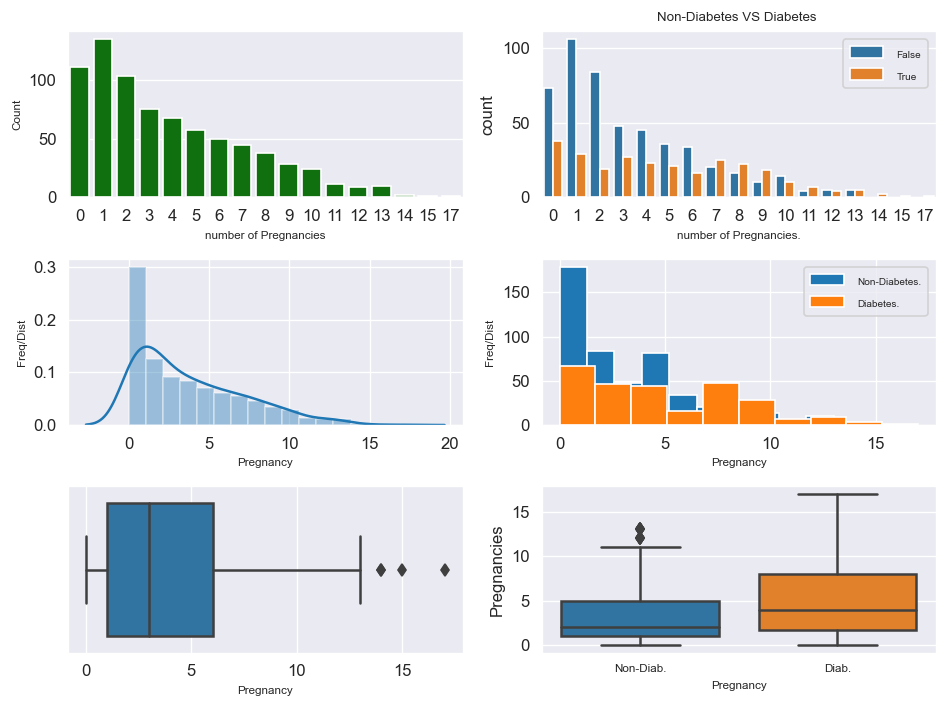

In [79]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=data,ax=axes[0][0],color='green')
axes[0][0].set_xlabel('number of Pregnancies',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.countplot('Pregnancies',data=data,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Non-Diabetes VS Diabetes ',fontdict={'fontsize':8})
axes[0][1].set_xlabel('number of Pregnancies.',fontdict={'fontsize':7})



plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()


plot10 = sns.distplot(data['Pregnancies'],ax=axes[1][0])
axes[1][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = data[data['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diabetes.')
plot11_2=data[data['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diabetes.')
axes[1][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()



plot20 = sns.boxplot(data['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
plt.tight_layout()


plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=data,ax=axes[2][1])
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

**Result:**

The distribution of Pregnancies in data is unimodal and skewed to the right, centered at about 1 with most of the data between 0 and 15, A range of roughly 15, and outliers are present on the higher end.

Note :- BoxPlot of both categories shows that People with higher number of pregnancy have higher risk of Diabetes (There is not statistical evidence)

<h3>Glucose Variable</h3>

In [78]:
data.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

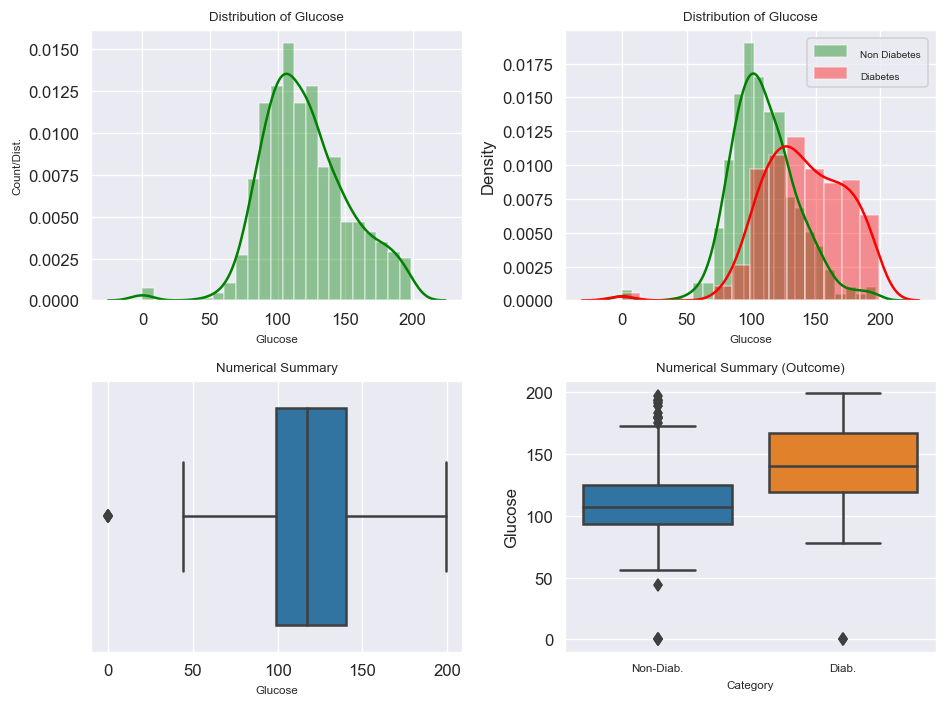

In [104]:
#sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(data['Glucose'],ax=axes[0][0],color='green')
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(data[data['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diabetes')
sns.distplot(data[data.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diabetes')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose',fontdict={'fontsize':7})


plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(data['Glucose'],ax=axes[1][0])
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=data,ax=axes[1][1],orient='v')
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()


**Result:**

The distribution of Glucose level among patients is unimodal and roughly bell shaped (Normal distribution), centered at about 115 with most of the data between 90 and 140, A range of roughly 150, and outliers are present on the lower end(Glucose ==0).

Note :- BoxPlot of both categories shows that People with higher Glucose level have higher risk of Diabetes (There is not statistical evidence). We can also see that some outliers are present on non diabetic patient observation.



**Verify distribution by keeping only non zero entry of Glucose**

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


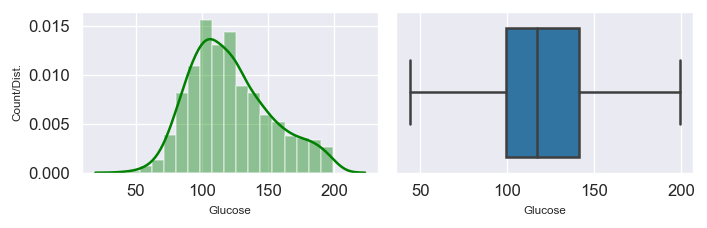

In [102]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(data[data['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(data[data['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
plt.tight_layout()


<h3>Blood Pressure variable</h3>

In [92]:
data.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

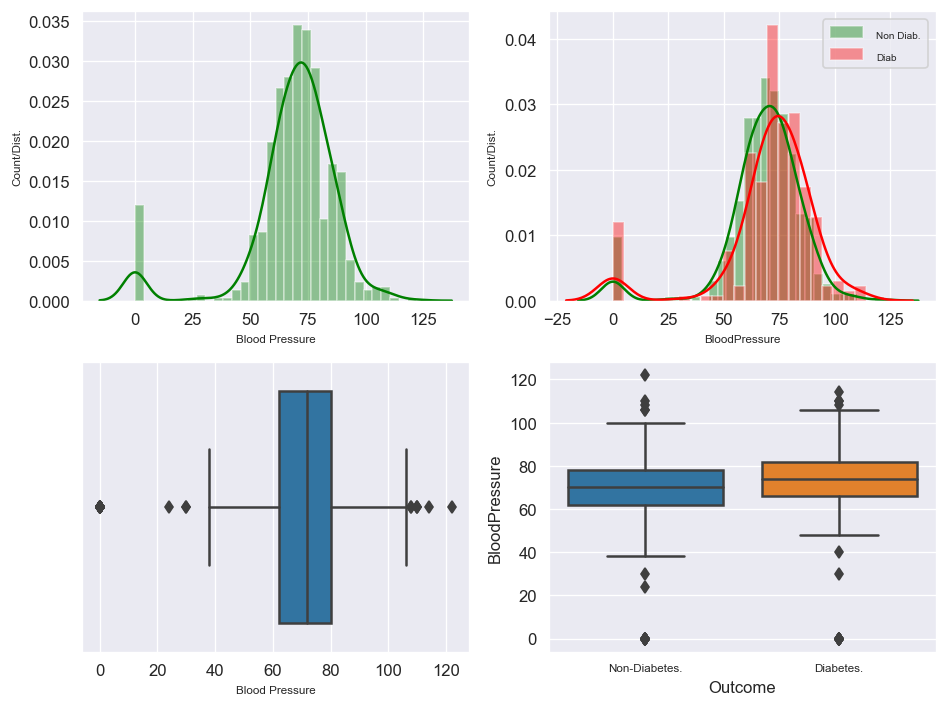

In [95]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(data['BloodPressure'],ax=axes[0][0],color='green')
axes[0][0].set_xlabel('Blood Pressure',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(data[data['Outcome']==False]['BloodPressure'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(data[data.Outcome==True]['BloodPressure'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(data['BloodPressure'],ax=axes[1][0],orient='v')
axes[1][0].set_xlabel('Blood Pressure',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='BloodPressure',data=data,ax=axes[1][1])
plt.xticks(ticks=[0,1],labels=['Non-Diabetes.','Diabetes.'],fontsize=7)
plt.tight_layout()

plt.show()

**Result:**

The distribution of BloodPressure among patients is unimodal (This is not a bimodal because BP=0 does not make any sense and it is Outlier) and bell shaped, centered at about 65 with most of the data between 60 and 80, A range of roughly 100, and outliers are present on the lower end(BP ==0).

Note :- BoxPlot of both categories shows that there is a little association of BP with Diabetic VS Non-Diabetic patients. (There is not statistical evidence, May be i will be testing a hypothesis in my 3rd notebook of this data.) We can also see that some outliers are present.

**Verify distribution by keeping only non zero entry of Glucose**

(Outliers can change whole understanding about data.)

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


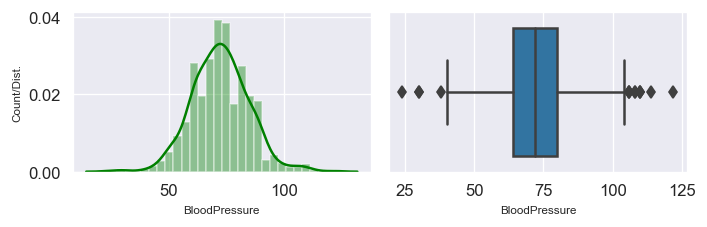

In [106]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))

plot0=sns.distplot(data[data['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(data[data['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
plt.tight_layout()

<h3>SkinThickness Variable</h3>

In [96]:
data.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

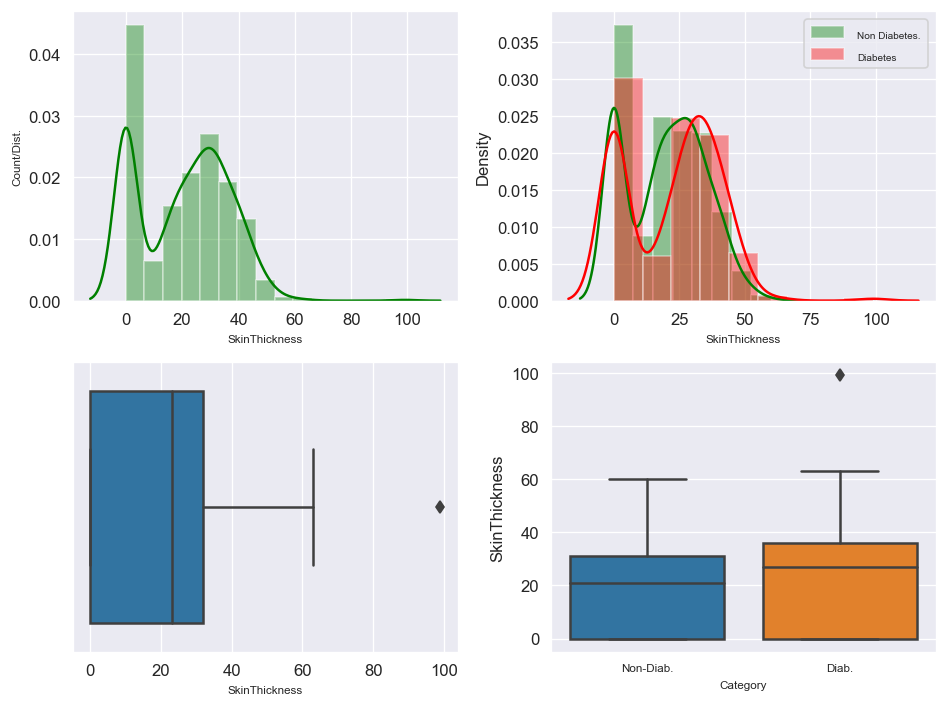

In [97]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(data['SkinThickness'],ax=axes[0][0],color='green')
axes[0][0].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(data[data['Outcome']==False]['SkinThickness'],ax=axes[0][1],color='green',label='Non Diabetes.')
sns.distplot(data[data.Outcome==True]['SkinThickness'],ax=axes[0][1],color='red',label='Diabetes')
axes[0][1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(data['SkinThickness'],ax=axes[1][0],orient='v')
axes[1][0].set_xlabel('SkinThickness',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='SkinThickness',data=data,ax=axes[1][1])
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

**Result:**

The distribution of SkinThickness among patients is looking like Bimodal (But i think, This is not a bimodal because ST=0 does not make any sense and it may effect distribution, I will verify it ) and it is bell shaped, centered at about 20 with most of the data between 15 and 45, A range of roughly 60, and outliers are present on the lower end(ST ==0).

Note :- BoxPlot of both categories shows that there is a little association of ST among Diabetic VS Non-Diabetic patients. (There is not statistical evidence)

**Verify distribution by keeping only non zero Sking Thickness**

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


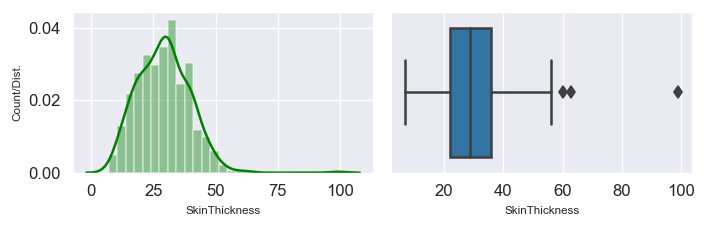

In [108]:

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (6,2))


plot0=sns.distplot(data[data['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='green')
axes[0].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(data[data['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})

plt.tight_layout()

Distribution is normal and bell shaped , ST==0 is outlier 

<h1>Multivariate Statistical Analysis</h1>

**Multivariate analysis (MVA) is a Statistical procedure for analysis of data involving more than one type of measurement or observation. It may also mean solving problems where more than one dependent variable is analyzed simultaneously with other variables.Univariate involves the analysis of a single variable while multivariate analysis examines two or more variables.** 

I will be using only first 3 or 4 variable to show the workflow of Univariate Statistical Analysis

<h3>Pairplot</h3>

Let us take a closer look at data by doing a quick visualization

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 720x480 with 0 Axes>

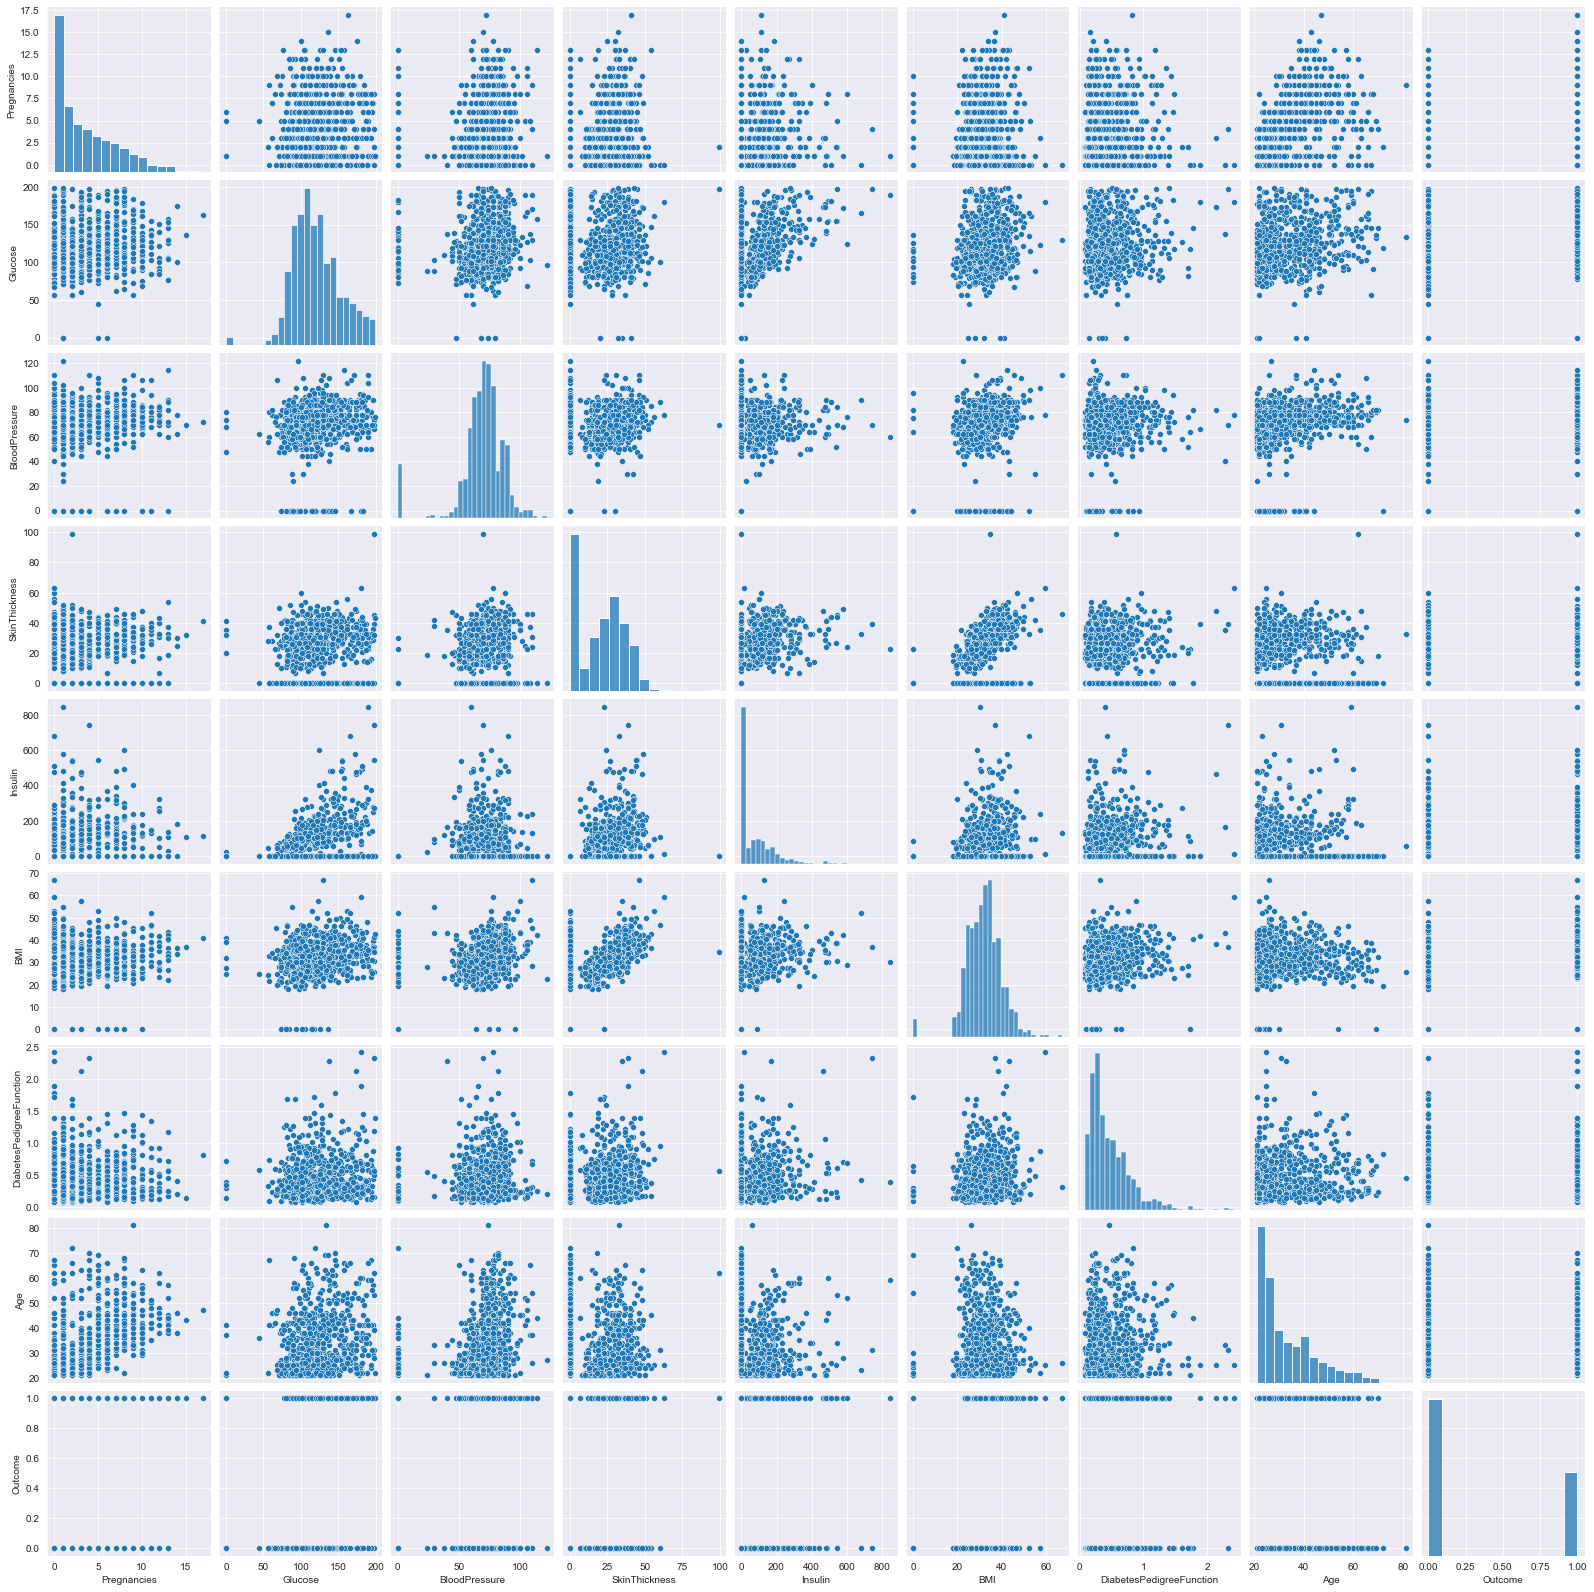

In [109]:
plt.figure(dpi=120)
sns.pairplot(data)
plt.show()

**Summary:**

Well, Pregnancies, Insulin, DiabetesPedigreeFunction and Age having skewed distribution. We know most of the machine learning models uses assumpton of normality so these variables might need to be scaled, But we may consider the assumption to be true according Central Limit Theorem that if number of observation is large we can consider the distribution to be normal or bell shaped. Removing Outliers may also help us to achieve normal distribution of that variable.

It looks like Glucose, DiabetesPedigreeFunction and BMI variables have some outliers.

Variables are not correlated strongly with each other. I will plot a correlation matrix later.



pairplot according to outcome

<Figure size 720x480 with 0 Axes>

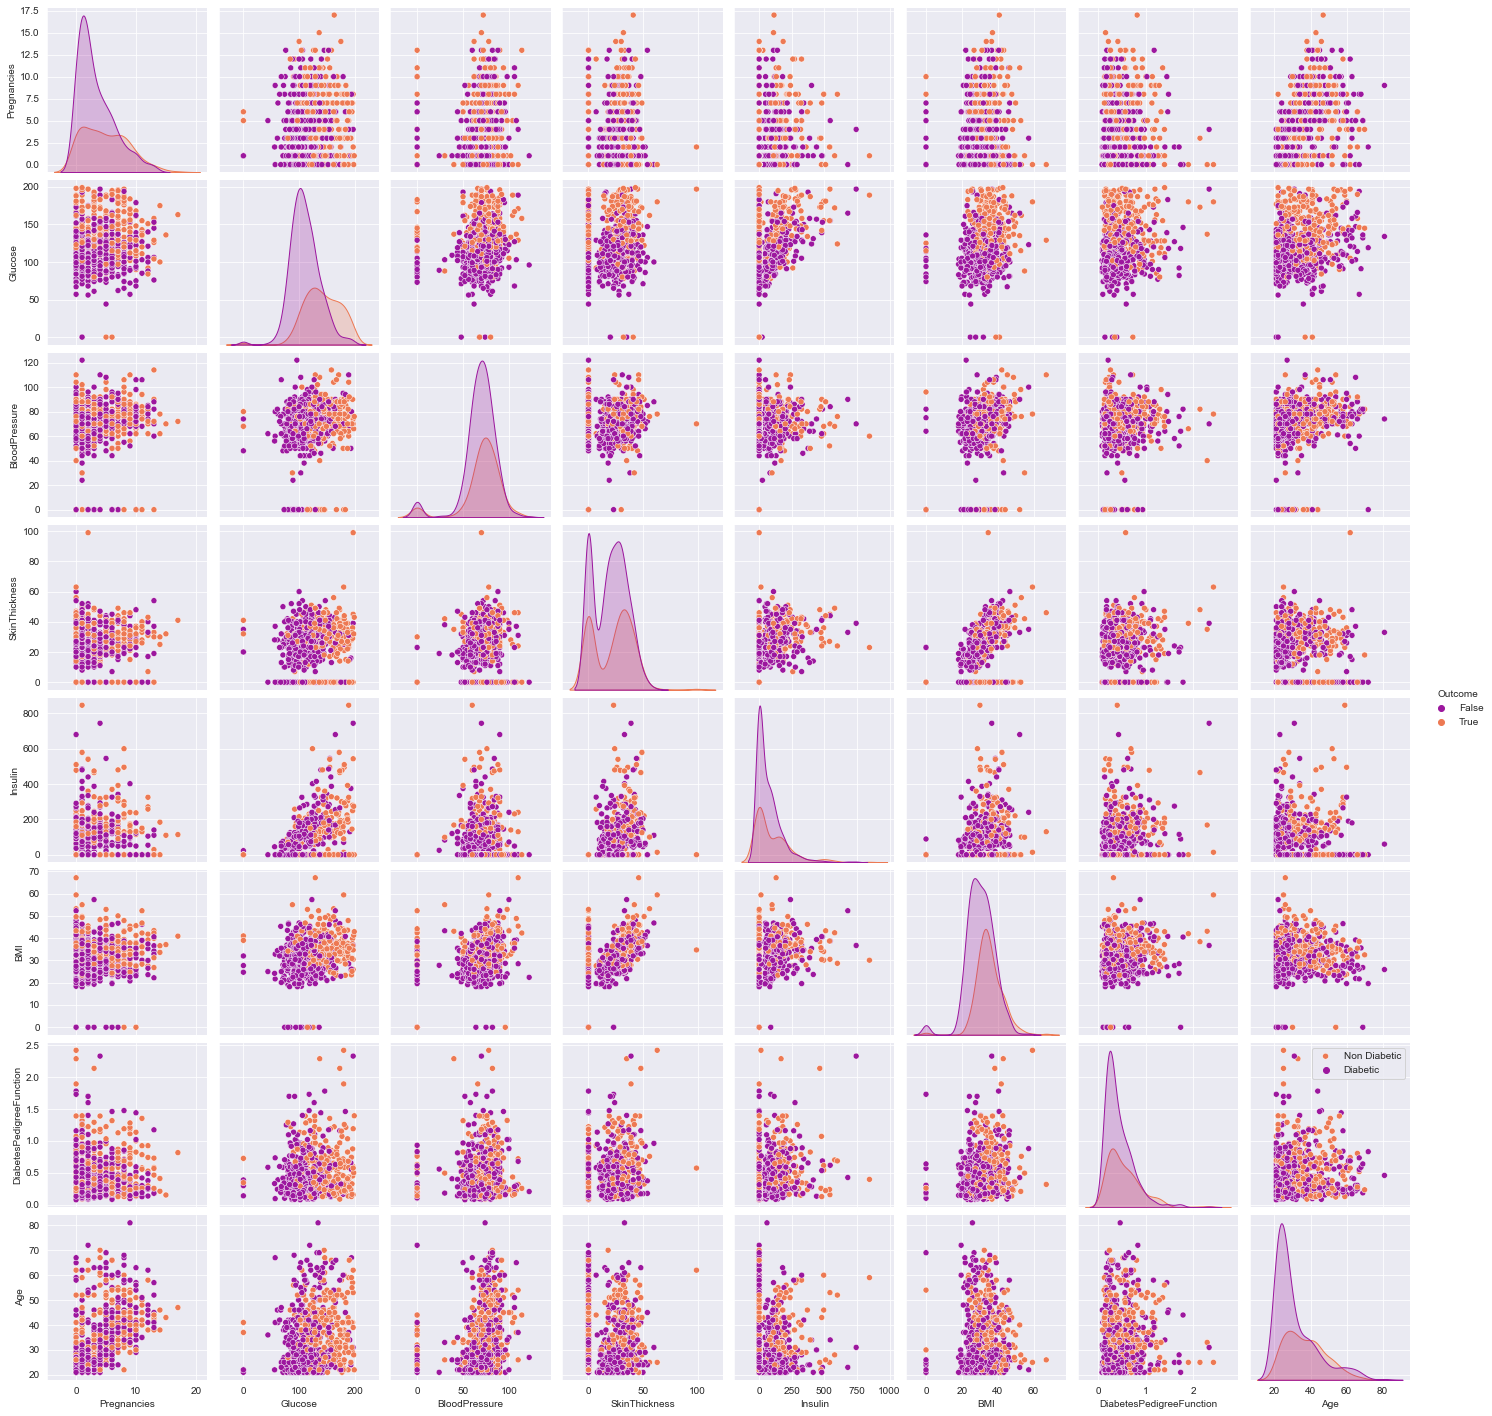

In [111]:
plt.figure(dpi = 120)
sns.pairplot(data,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

**Summary:** 

We can clearly see that data points are not seperable linearly according to Outcome. Distribution of variables are normal, In some variables they are skewed to right due to Outliers. Treating Outliers may help to get rid of them. Because data points are spread non linear, Fitting tree based models might help us to get better accuracy or SVC with Non Linear Dicision Boundry.

<h3>Correlation</h3>


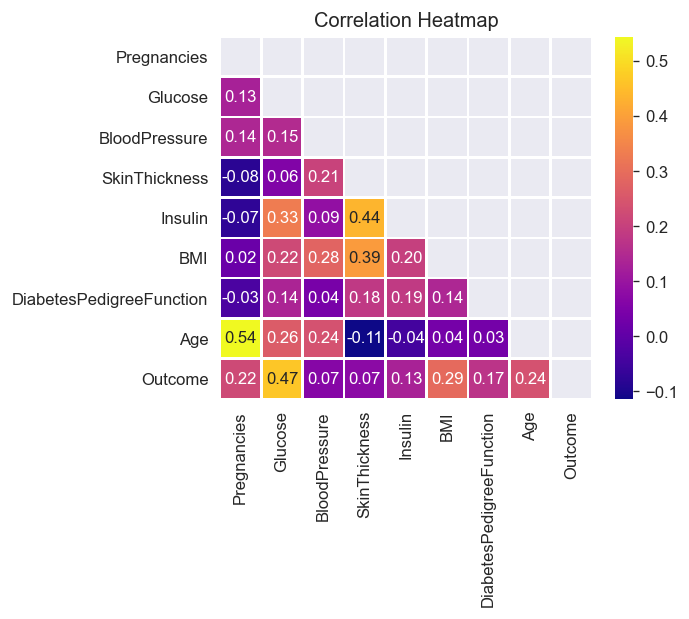

In [114]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Variables are not much associated linearly

<h3>Joint plot of Glucose with Other Variables</h3>

Joint plot of Glucose with Other Variables: 

Correlation between Glucose and Pregnancies :  0.129458671499273


<Figure size 500x400 with 0 Axes>

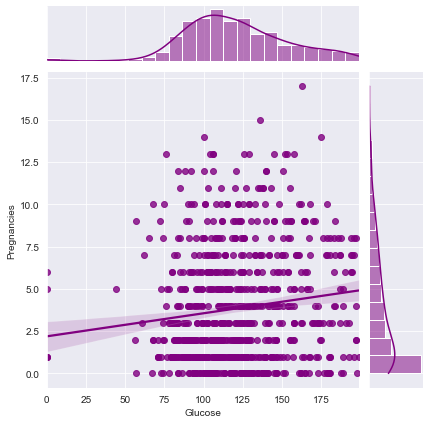

Correlation between Glucose and BloodPressure :  0.15258958656866448


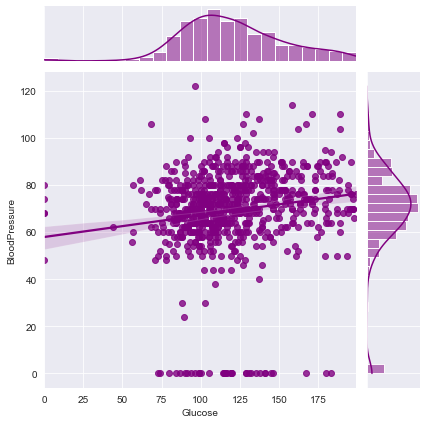

Correlation between Glucose and SkinThickness :  0.057327890738176825


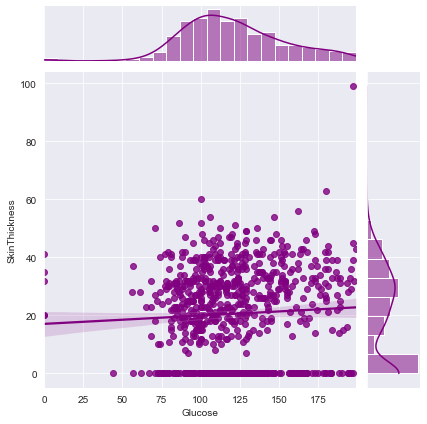

Correlation between Glucose and Insulin :  0.3313571099202081


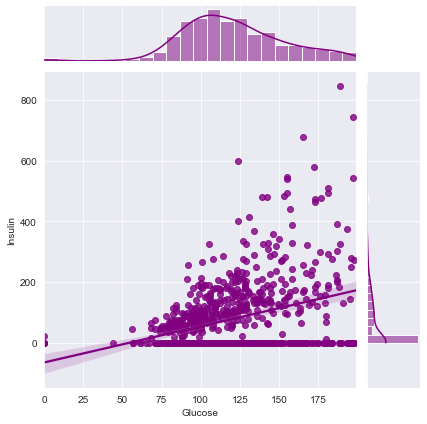

Correlation between Glucose and BMI :  0.22107106945898305


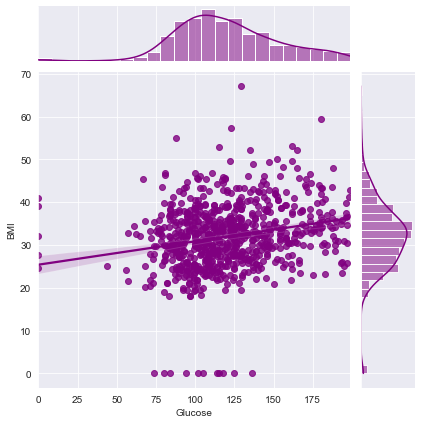

Correlation between Glucose and DiabetesPedigreeFunction :  0.1373372998283708


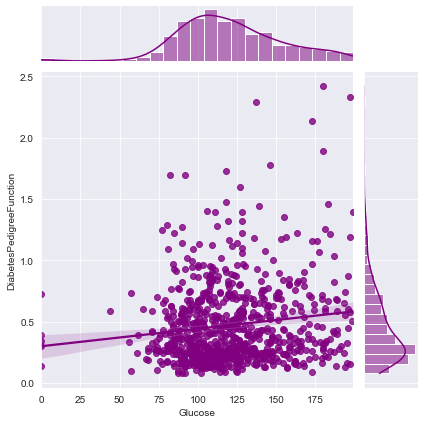

Correlation between Glucose and Age :  0.26351431982433376


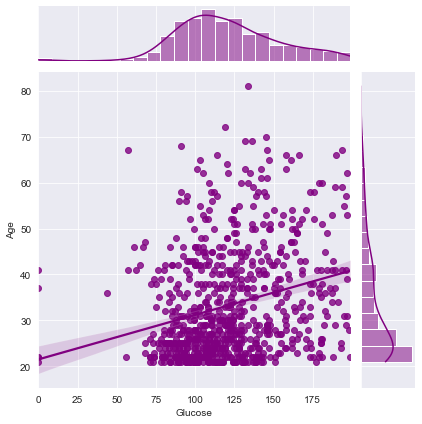

In [14]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables: \n")
for i in  data.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} : ",data.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=data,kind = 'reg',color = 'purple')
        plt.show()

**Insights:**

<font color='blue'>Glucose shows positive weak linear association with other variable in given dataset.</font>That means On increasing Glucose level in patients, Other variables will also increase. Weak linear association is good, so that we can escape out from Multicollinearity effect in Predective Modelling.

<h3>Joint plot of BloodPressure with Other Variables</h3>

Joint plot of  BloodPressure with Other Variables: 

Correlation between BloodPressure and Pregnancies :  0.14128197740714024


<Figure size 500x400 with 0 Axes>

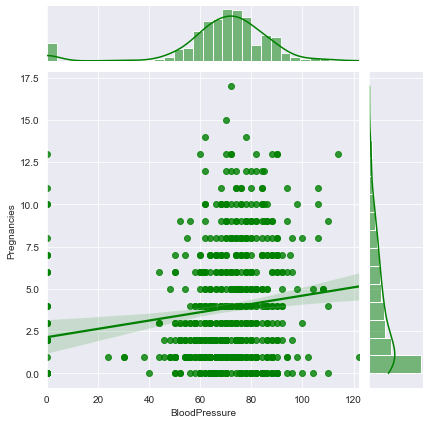

Correlation between BloodPressure and Glucose :  0.15258958656866448


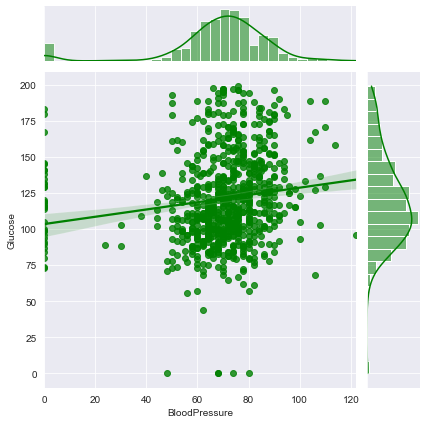

Correlation between BloodPressure and SkinThickness :  0.2073705384030703


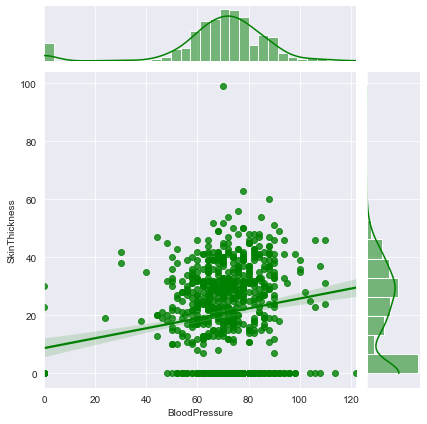

Correlation between BloodPressure and Insulin :  0.08893337837319296


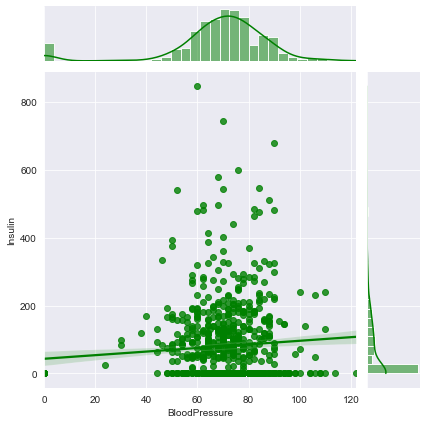

Correlation between BloodPressure and BMI :  0.28180528884991074


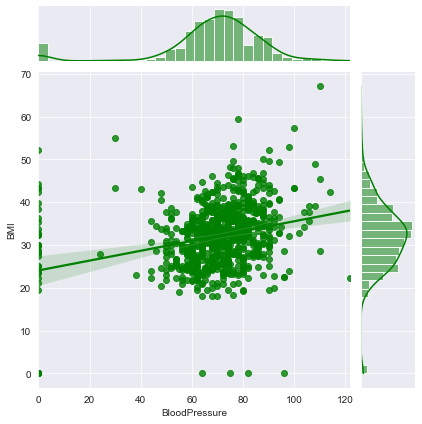

Correlation between BloodPressure and DiabetesPedigreeFunction :  0.04126494793009854


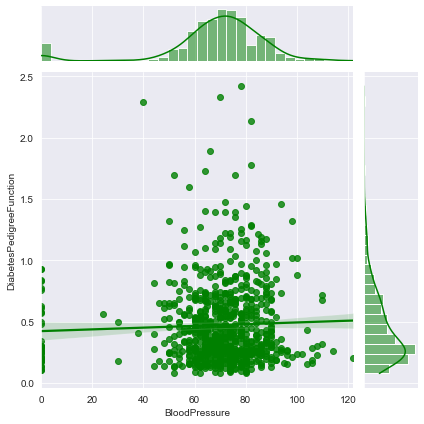

Correlation between BloodPressure and Age :  0.23952794642136382


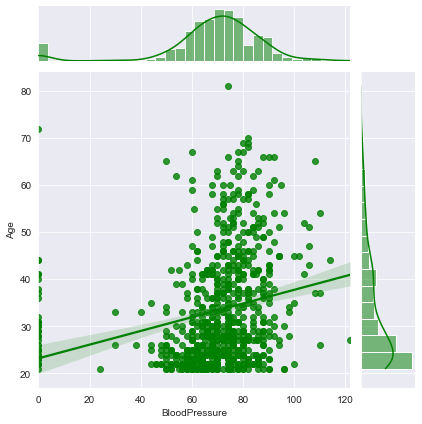

In [17]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  BloodPressure with Other Variables: \n")
for i in  data.columns:
    if i != 'BloodPressure' and i != 'Outcome':
        print(f"Correlation between BloodPressure and {i} : ",data.corr().loc['BloodPressure'][i])
        sns.jointplot(x='BloodPressure',y=i,data=data,kind = 'reg',color = 'green')
        plt.show()

**Insights:**

<font color='blue'>BloodPressure shows positive weak linear association with other variable in given dataset.</font>That means On increasing BloodPressure level in patients, Other variables will also increase.

<h3>Joint plot of SkinThickness with Other Variables</h3>

Joint plot of  SkinThickness with Other Variables: 

Correlation between SkinThickness and Pregnancies :  -0.08167177444900703


<Figure size 500x400 with 0 Axes>

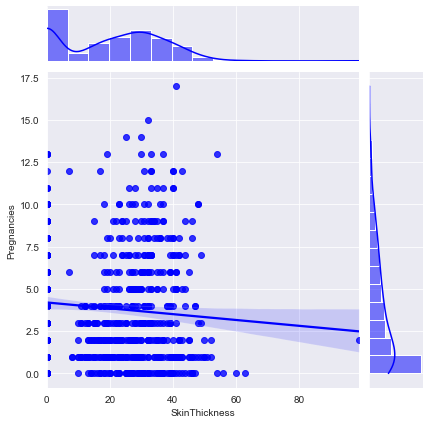

Correlation between SkinThickness and Glucose :  0.057327890738176825


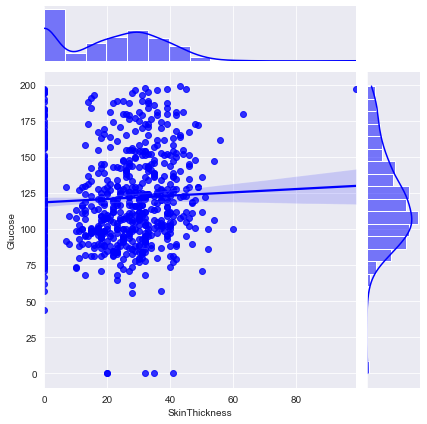

Correlation between SkinThickness and BloodPressure :  0.2073705384030703


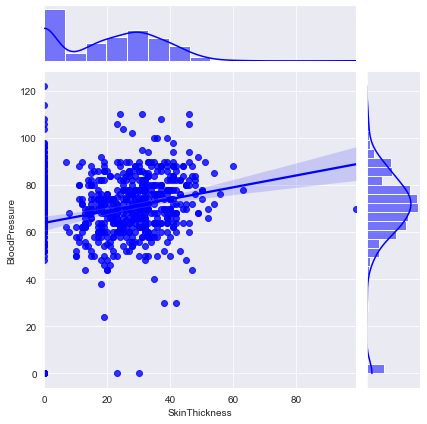

Correlation between SkinThickness and Insulin :  0.4367825701200101


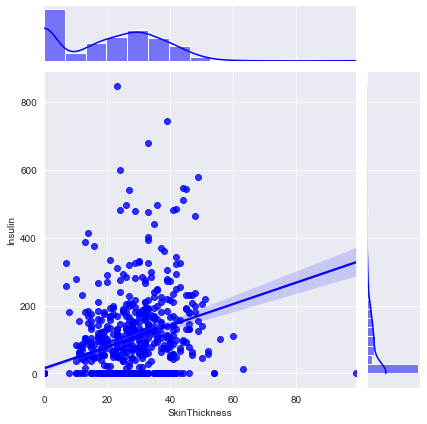

Correlation between SkinThickness and BMI :  0.3925732041590375


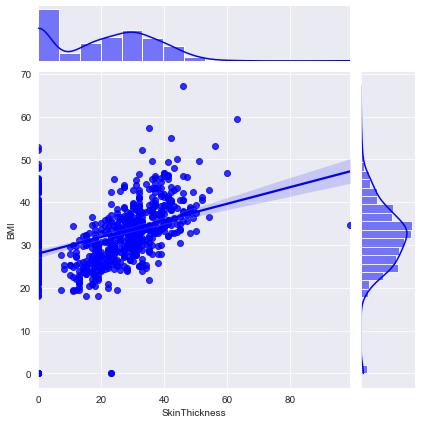

Correlation between SkinThickness and DiabetesPedigreeFunction :  0.18392757295416273


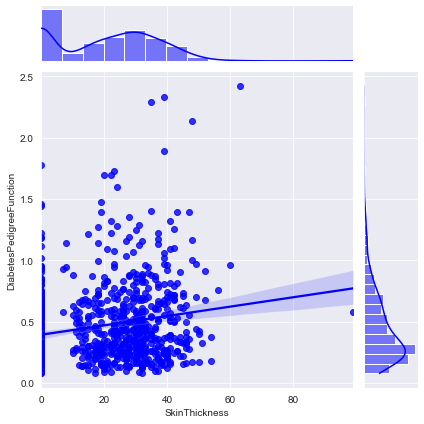

Correlation between SkinThickness and Age :  -0.11397026236774202


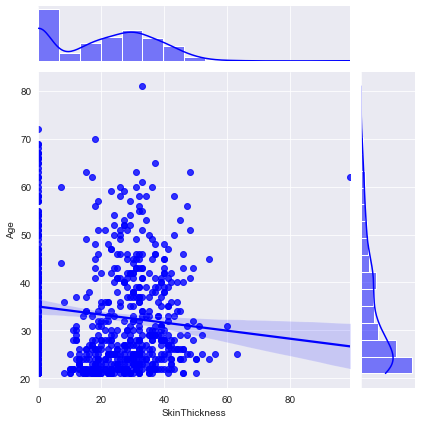

In [18]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  SkinThickness with Other Variables: \n")
for i in  data.columns:
    if i != 'SkinThickness' and i != 'Outcome':
        print(f"Correlation between SkinThickness and {i} : ",data.corr().loc['SkinThickness'][i])
        sns.jointplot(x='SkinThickness',y=i,data=data,kind = 'reg',color = 'blue')
        plt.show()

**Insight**

<font color='blue'>SkinThickness shows positive weak linear association with other variable in given dataset ,<font color='red'>(Except with Age) .</font></font> That means On increasing SkinThickness in patients, Other variables will also increase.SkinThickness with Age show a weak negative correlation, that means on increasing SkinThickness , Age must decrease.



**It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.But, because these values are either missing or outliers, But i am not going to alter them so that i can see actual statistics of Data.**

<h3>Joint plot of Insulin  with Other Variables</h3>

Joint plot of  Insulin with Other Variables: 

Correlation between Insulin and Pregnancies :  -0.07353461435162809


<Figure size 500x400 with 0 Axes>

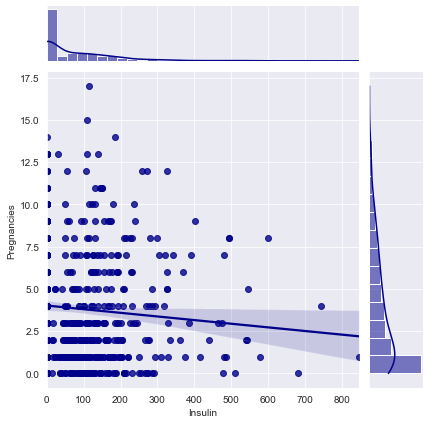

Correlation between Insulin and Glucose :  0.3313571099202081


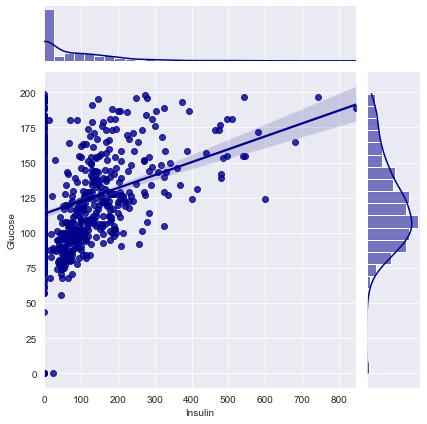

Correlation between Insulin and BloodPressure :  0.08893337837319296


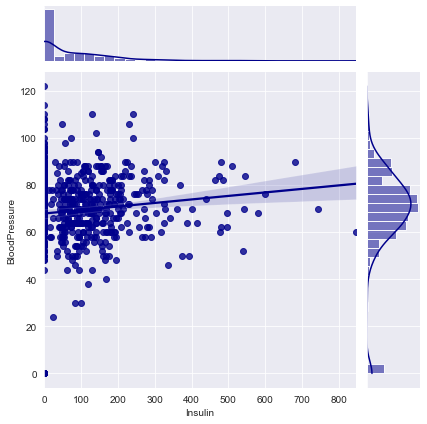

Correlation between Insulin and SkinThickness :  0.4367825701200101


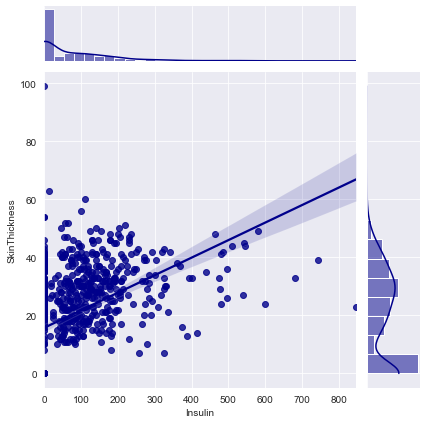

Correlation between Insulin and BMI :  0.1978590564931006


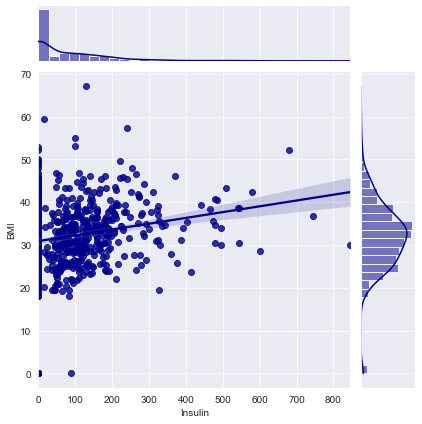

Correlation between Insulin and DiabetesPedigreeFunction :  0.18507092916809925


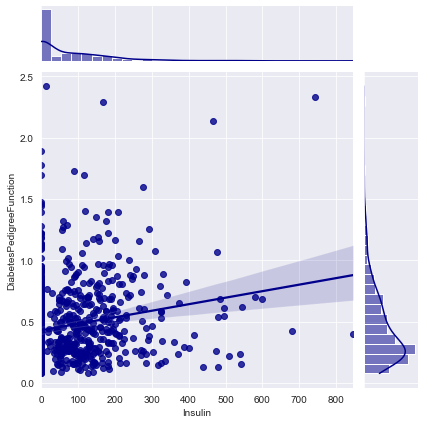

Correlation between Insulin and Age :  -0.04216295473537666


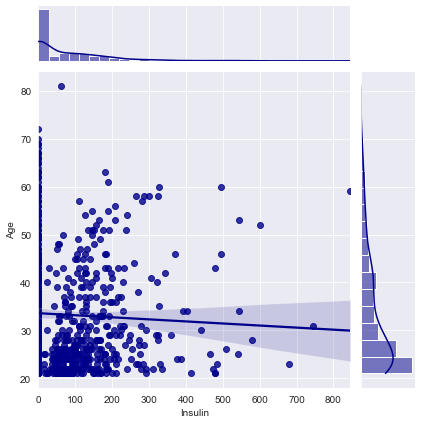

In [20]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  Insulin with Other Variables: \n")
for i in  data.columns:
    if i != 'Insulin' and i != 'Outcome':
        print(f"Correlation between Insulin and {i} : ",data.corr().loc['Insulin'][i])
        sns.jointplot(x='Insulin',y=i,data=data,kind = 'reg',color = 'darkblue')
        plt.show()

**Insights**

<font color='blue'>Insulin shows positive weak linear association with other variable in given dataset ,<font color='blue'>(Except with Age) .</font></font> That means On increasing Insulin level in patients, Other variables will also increase.Insulin with Age show a weak negative correlation, that means on increasing SkinThickness , Age must decrease.

<h3>Joint plot of BMI  with Other Variables</h3>

Joint plot of  BMI with Other Variables: 

Correlation between BMI and Pregnancies :  0.017683090727830673


<Figure size 500x400 with 0 Axes>

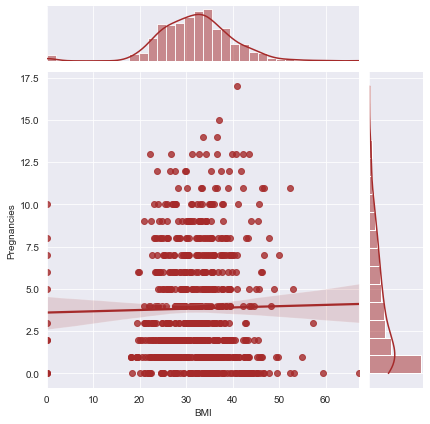

Correlation between BMI and Glucose :  0.22107106945898305


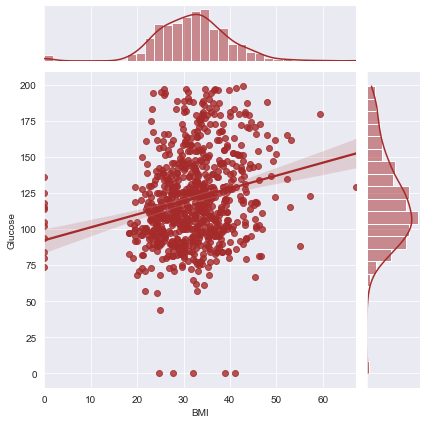

Correlation between BMI and BloodPressure :  0.28180528884991074


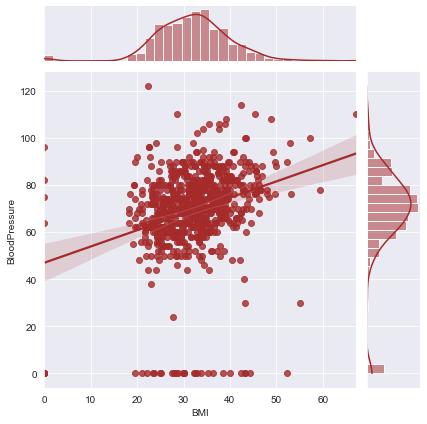

Correlation between BMI and SkinThickness :  0.3925732041590375


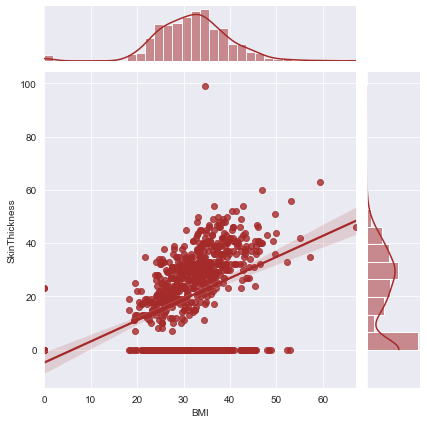

Correlation between BMI and Insulin :  0.1978590564931006


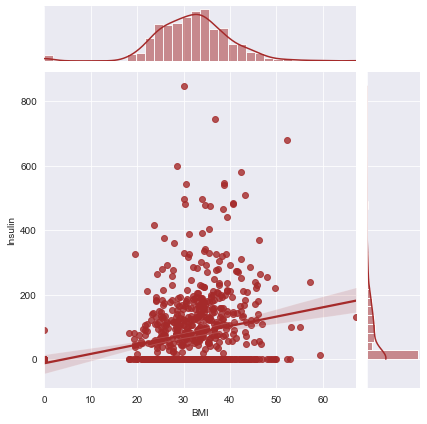

Correlation between BMI and DiabetesPedigreeFunction :  0.14064695254510545


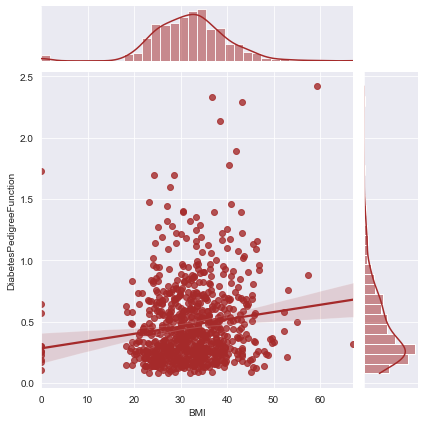

Correlation between BMI and Age :  0.036241870092294085


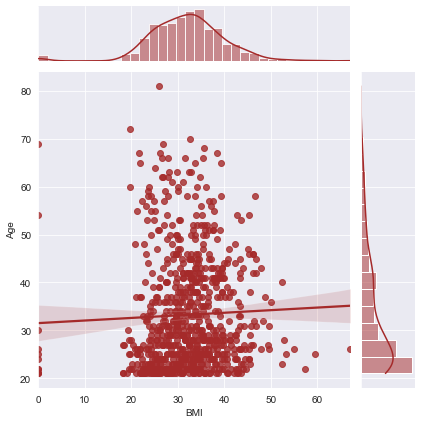

In [24]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  BMI with Other Variables: \n")
for i in  data.columns:
    if i != 'BMI' and i != 'Outcome':
        print(f"Correlation between BMI and {i} : ",data.corr().loc['BMI'][i])
        sns.jointplot(x='BMI',y=i,data=data,kind = 'reg',color = 'brown')
        plt.show()

**Insights**

<font color='blue'>BMI shows positive weak linear association with other variable in given dataset.</font> That means On increasing BMI level in patients, Other variables will also increase.

<h3>Joint plot of DiabetesPedigreeFunction  with Other Variables</h3>

Joint plot of  DiabetesPedigreeFunction with Other Variables: 

Correlation between DiabetesPedigreeFunction and Pregnancies :  -0.03352267296261325


<Figure size 500x400 with 0 Axes>

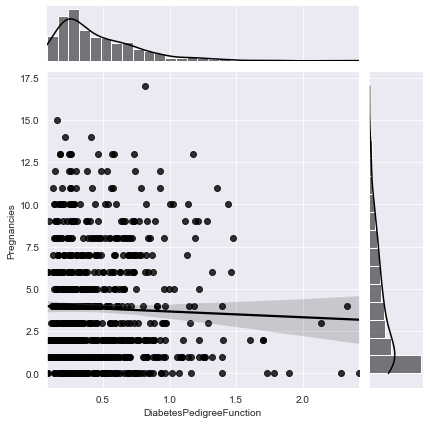

Correlation between DiabetesPedigreeFunction and Glucose :  0.1373372998283708


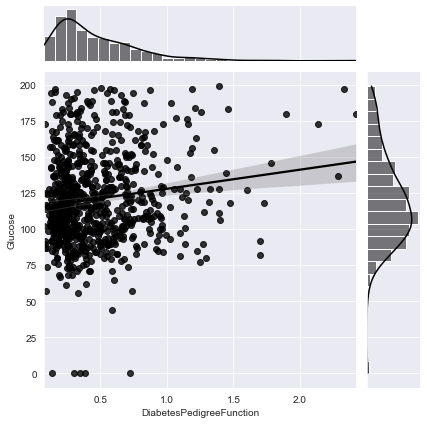

Correlation between DiabetesPedigreeFunction and BloodPressure :  0.04126494793009854


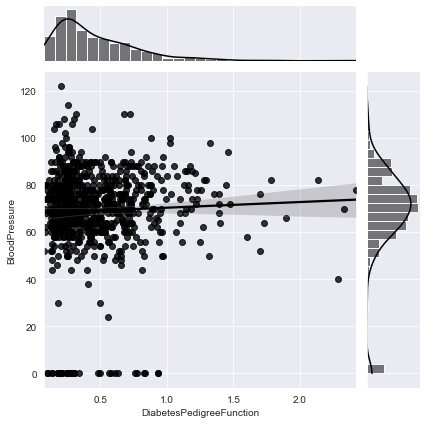

Correlation between DiabetesPedigreeFunction and SkinThickness :  0.18392757295416273


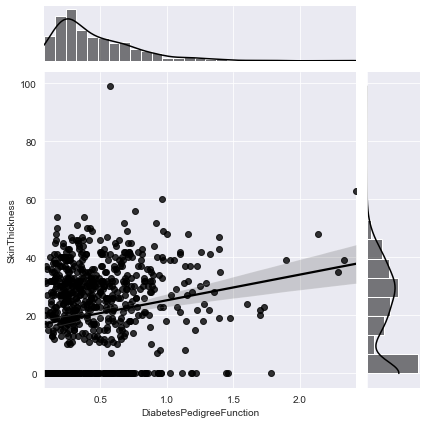

Correlation between DiabetesPedigreeFunction and Insulin :  0.18507092916809925


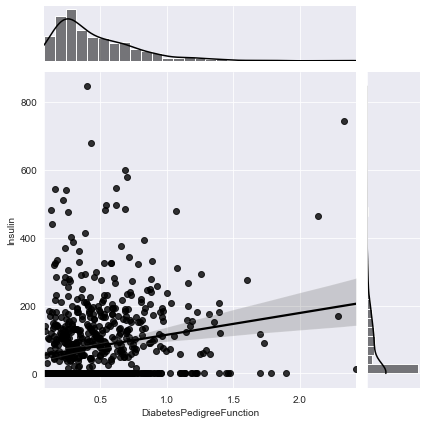

Correlation between DiabetesPedigreeFunction and BMI :  0.14064695254510545


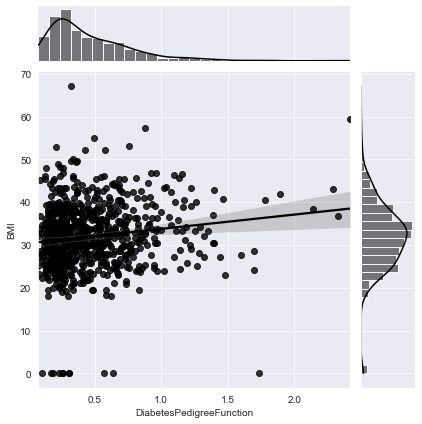

Correlation between DiabetesPedigreeFunction and Age :  0.03356131243480559


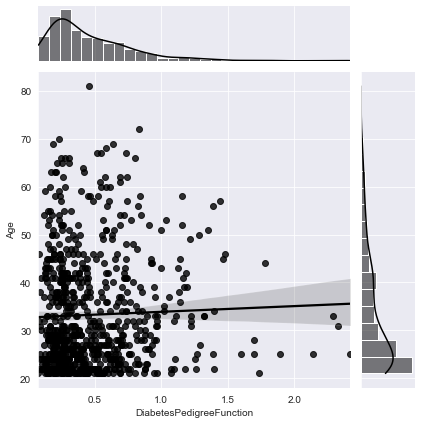

In [25]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  DiabetesPedigreeFunction with Other Variables: \n")
for i in  data.columns:
    if i != 'DiabetesPedigreeFunction' and i != 'Outcome':
        print(f"Correlation between DiabetesPedigreeFunction and {i} : ",data.corr().loc['DiabetesPedigreeFunction'][i])
        sns.jointplot(x='DiabetesPedigreeFunction',y=i,data=data,kind = 'reg',color = 'black')
        plt.show()

**Insights**

<font color='blue'>DiabetesPedigreeFunction shows positive weak linear association with other variable in given dataset.</font> That means On increasing DPF in patients, Other variables will also increase.

<h1>Inferential Statistics</h1>

**We always work with sample of data, When we make inferences about population we should always consider standard estimated error. I will be finding mean and proportion of different variables with 95% confidence Interval.**

<h3>assumption for finding confidence interval</h3>

**1- Samples have equal chance of being selected from Population (Simple Random Sampling)**

**2- Normality (Distribution of desired variable is normal)**

**3- If in case distribution of some parameter of interest is not distributed normal, we may assume normallity using Central Limit Theorem, Larger sample size**

**Confidence interval is range of reasonable value of Parameter of Interest. We calculate lower confidence bound and upper confidence bound, Center of it, is the best point estimate.
95% of confidence interval is exactly, When we draw 100 samples from population and make intervals on these 100 samples then we would expect 95 intervals to contain true population inference.**

**Why Confidence Intervals?**

Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.  For example, in the lecture, we estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

**How are Confidence Intervals Calculated?**

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

# Question 1

What proportion of people report they have diabetes (according to given sample of data)?

opulation ==> Peoples with Diabetes

Parameter of Interest ==> A Proportion

**Task : ** Construct a 95% Confidence Interval for the population proportion of people reporting.
they have diabetes

In [27]:
data.Outcome.replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(data.Outcome.value_counts())

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64


In [30]:
n = data.shape[0]
diabetic = data.Outcome.value_counts().loc['Diab']
print("\nTotal Observation ==>",n,"\t","Number of Diabetic Patient==> ",diabetic,"\n")
import statsmodels.api as sm
print("\n95% Confidence interval with statsmodels library ==>",sm.stats.proportion_confint(diabetic, n),"\n")


Total Observation ==> 768 	 Number of Diabetic Patient==>  268 


95% Confidence interval with statsmodels library ==> (0.3152483405027714, 0.38266832616389523) 



**Interpreting Confidence Interval about Proportion of People with Diabetes**

With 95% confidence, the population proportion of people having diabetes is estimated to be between 31.52% - 38.26%.

# Question 2.1

Q 2.1 : What is average for number of Pregnancies for Patients with diabetes?

Population ==> All Patients with Diabetes

Parameter of Interest ==> Population Mean of number of Pregnancies for Patients with diabetes.

**Task : **Construct a 95% C.I. for population mean Pregnancies month for all Patients with Diabetes.

In [34]:
data_diabetic = data[data.Outcome=='Diab']
data_diabetic.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50    Diab  
2                     0.672   32    Diab  
4                     2.288   33    Diab  
6                     0.248   26    Diab  
8                     0.158   53    Diab

In [35]:
print("\n95% Confidence Interval with statsmodels library ==>",sm.stats.DescrStatsW(data_diabetic['Pregnancies']).zconfint_mean())


95% Confidence Interval with statsmodels library ==> (4.417756079185482, 5.313587204396608)


**Interpretation**

With 95% confidence, the population mean Pregnancies for all Patients with Diabetes is estimated to be
between 4.417 number of Pregnancies and 5.314 number of Pregnancies.


# Question 2.2

**Q 2.2 : What is average for number of Pregnancies for non diabetic patients?**

Population ==> All Non diabetic patients

Parameter of Interest ==> Population Mean of number of Pregnancies for non diabetic patients.

Task : Construct a 95% C.I. for population mean Pregnancies for all non diabetic patients.

In [37]:
data_non_diabetic = data[data.Outcome=='Non-Diab']
data_non_diabetic.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age   Outcome  
1                      0.351   31  Non-Diab  
3                      0.167   21  Non-Diab  
5                      0.201   30  Non-Diab  
7                      0.134   29  Non-Diab  
10                     0.191   30  Non-Diab

In [38]:
print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(data_non_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library ==> (3.033536970425177, 3.562463029574823)


**Interpretation**

With 95% confidence, the population mean Pregnancies for all non diabetic Patients is estimated to be between number of Pregnanciesand 3.562 number of Pregnancies.


<h1>Predictive Modelling</h1>

## Preprocessing

#### Missing Values & Outliers

In [48]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

**<font color='red'> It looks there is no missing values. But in descriptive statistics we have seen that some variables have minimum = 0  which is not making sense. So let us explore these variables and treat them .</font>**

**we have seen that variables are following normal distribution , So with Statistical Evidence we can fill values using Mean, Median and Mode.**


In [49]:
data['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


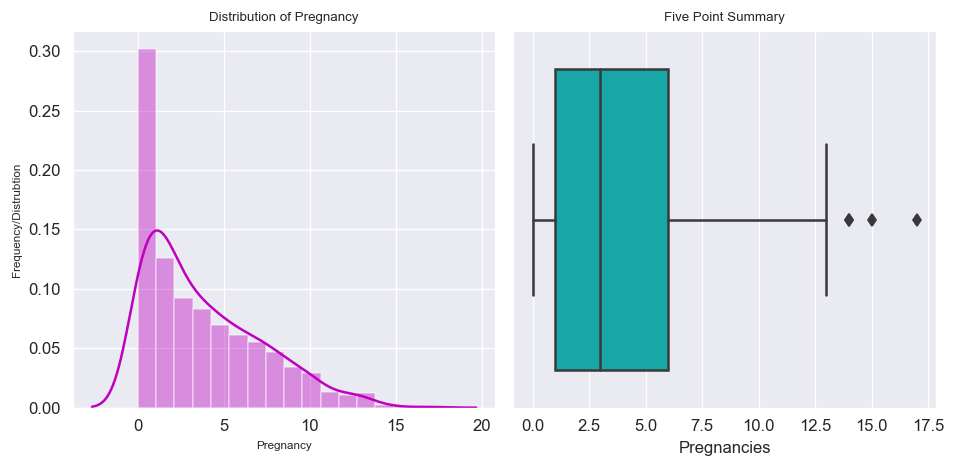

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=data,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**function to handle outliers.Standard deviation based detection**

In [56]:
def std_based(col_name,data):
    mean = data[col_name].mean()
    std = data[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_data = data[(data[col_name] < upper) & (data[col_name] > lower)]
    return new_data

## Treating Outliers

**Before treating outliers, I describe a bit about skewness, because it is important to know which of statistics (Mean,Median,Mode) we should replace.**

<h3> Skewness</h3>

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

**Mode:** The most frequently occurred number in a given set of observations is called mode.The mode can be one or more than one. It is possible to have no mode at all, as well.***When there is a nominal distribution of data, the mode is preferred.***

**Median:** The middle number in a given set of observations is called Median.After arranging everything from smallest to biggest, take out the middle number, which is your median.***When data distribution is skewed, median is the best representative.***

**Mean:** The average taken of given observations is called Mean.Add up all the numbers and divide by the total number of terms.***When data is normally distributed, the mean is widely preferred.***

### Treating Outliers

### I will use plot twice one before treating and another after treatment to see changes

**Pregnancy variable**

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


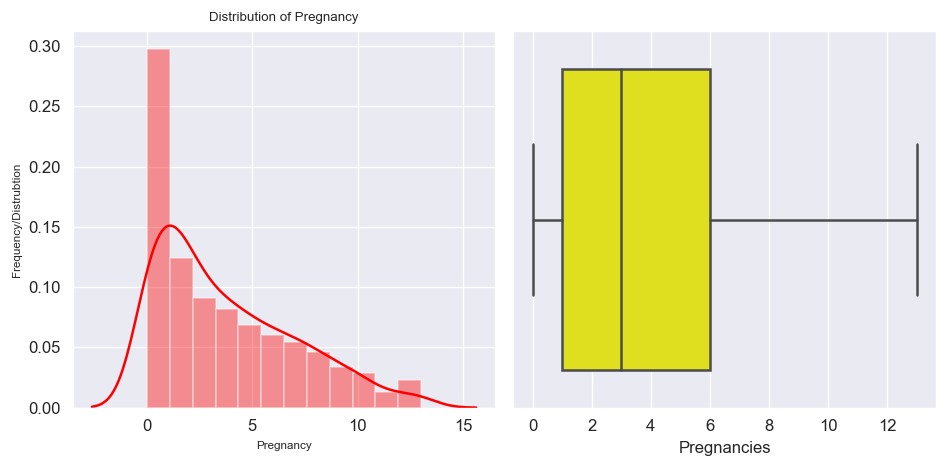

In [59]:
data = std_based('Pregnancies',data)
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=data,ax=axes[1],orient = 'v',color='yellow')
plt.tight_layout()


**Glucose variable**

In [60]:
data['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

<font color = 'blue'> Glucose = 0, does not make any sense. </font>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


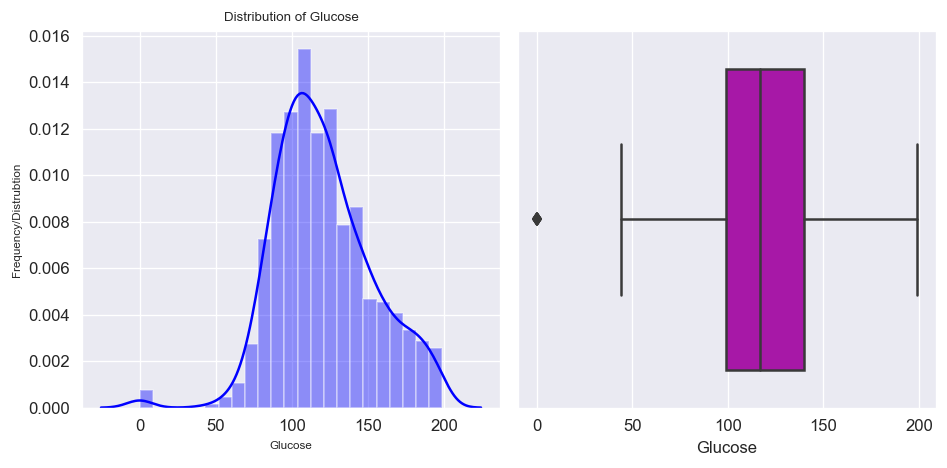

In [61]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=data,ax=axes[1],orient = 'v',color='m')
plt.tight_layout()

<font color = 'blue'> There is no outlier and also distribution is normal , So i will treat 0 with mean value.</font>

In [62]:
data.Glucose = data.Glucose.replace(0,data.Glucose.mean())
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0             72             35        0  33.6  0.627   
1            1     85.0             66             29        0  26.6  0.351   
2            8    183.0             64              0        0  23.3  0.672   
3            1     89.0             66             23       94  28.1  0.167   
4            0    137.0             40             35      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


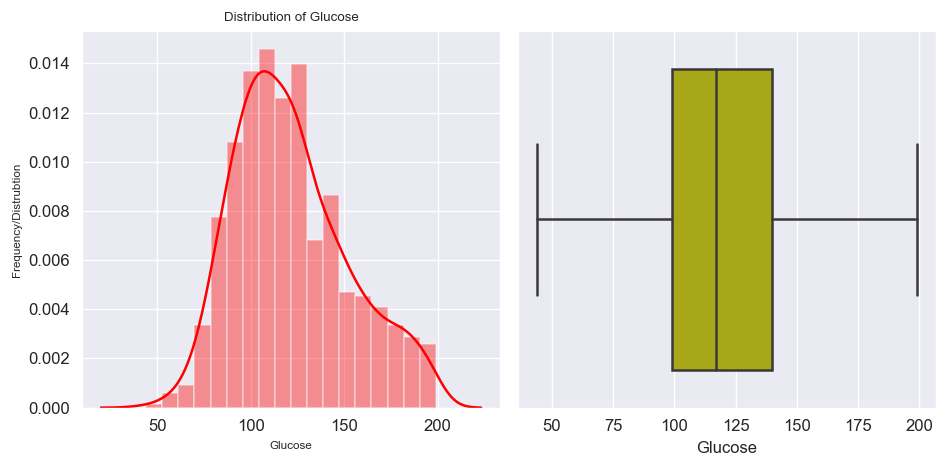

In [63]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=data,ax=axes[1],orient = 'v',color='y')
plt.tight_layout()

**BloodPressure variable**

In [64]:
data.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<font color = 'blue'> BloodPressure = 0, does not make any sense. </font>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


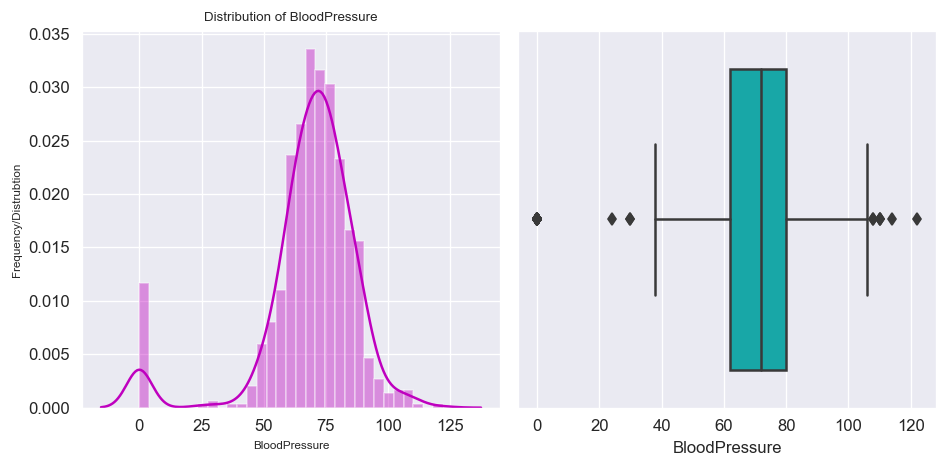

In [65]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=data,ax=axes[1],orient = 'v',color='c')
plt.tight_layout()

**It looks there are few Outliers at both higher end and lower end. But at higher end maximum BloodPressure is 122, So it is considerable. Now at lower end BloodPressure near 25 is not making sense. So i will treat missing value with medium and then i will also treat outliers.**

In [66]:
data.BloodPressure = data.BloodPressure.replace(0,data.BloodPressure.median())
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0             72             35        0  33.6  0.627   
1            1     85.0             66             29        0  26.6  0.351   
2            8    183.0             64              0        0  23.3  0.672   
3            1     89.0             66             23       94  28.1  0.167   
4            0    137.0             40             35      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

In [67]:
data  = std_based('BloodPressure',data)

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


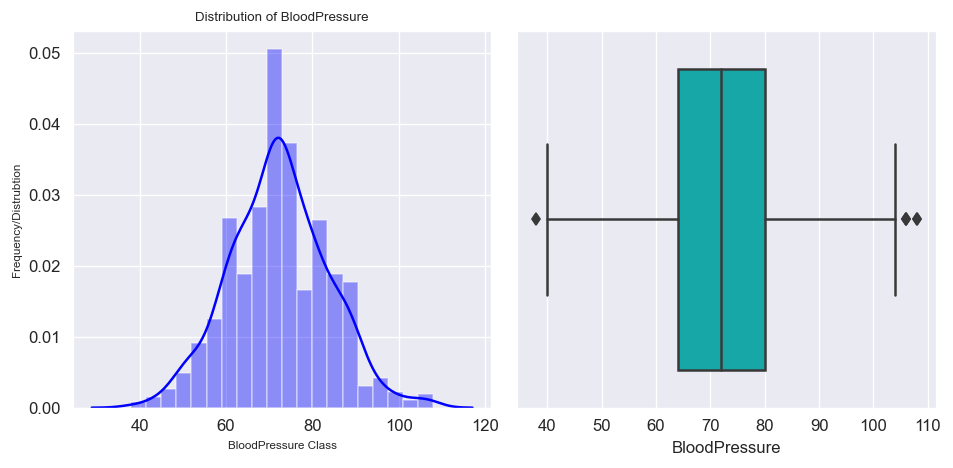

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=data,ax=axes[1],orient = 'v',color='c')
plt.tight_layout()

**SkinThickness variable**

In [69]:
data.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<font color = 'blue'> SkinThickness = 0, does not make any sense. </font>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


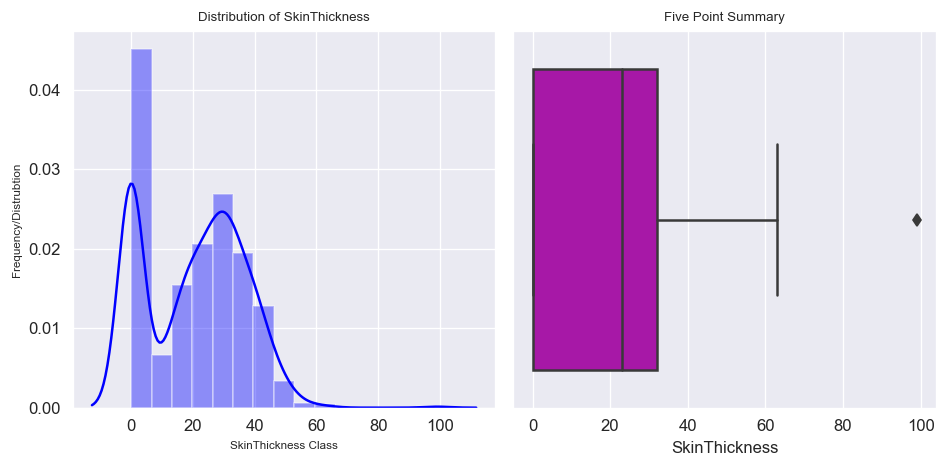

In [71]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=data,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [72]:
data.SkinThickness = data.SkinThickness.replace(0,data.SkinThickness.mean())
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0             72      35.000000        0  33.6  0.627   
1            1     85.0             66      29.000000        0  26.6  0.351   
2            8    183.0             64      20.428571        0  23.3  0.672   
3            1     89.0             66      23.000000       94  28.1  0.167   
4            0    137.0             40      35.000000      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


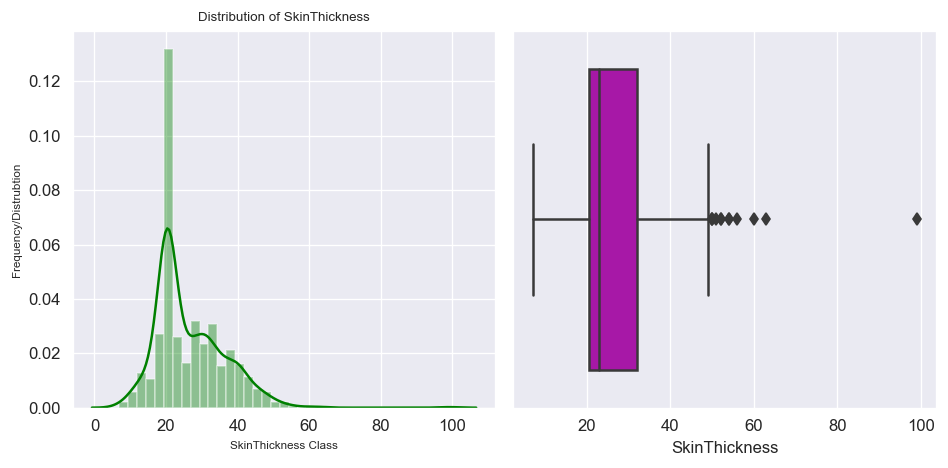

In [73]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=data,ax=axes[1],orient = 'v',color='m')
plt.tight_layout()

**Insulin variable**

In [74]:
data.Insulin.describe()

count    756.000000
mean      79.763228
std      115.756576
min        0.000000
25%        0.000000
50%       26.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<font color = 'blue'> SkinThickness = 0, does not make any sense. </font>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


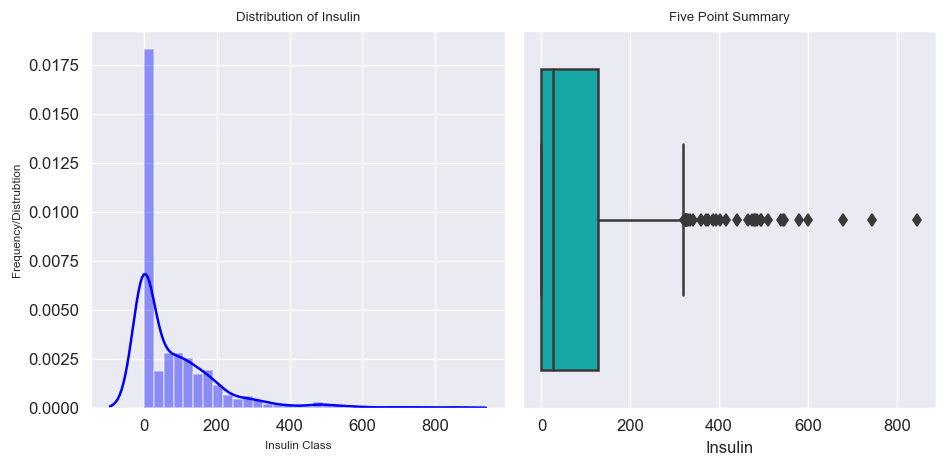

In [75]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=data,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

**There are many outliers. So i will fill 0 with Median of Insulin**

In [77]:
data.Insulin = data.Insulin.replace(0,data.Insulin.median())
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0             72      35.000000       26  33.6  0.627   
1            1     85.0             66      29.000000       26  26.6  0.351   
2            8    183.0             64      20.428571       26  23.3  0.672   
3            1     89.0             66      23.000000       94  28.1  0.167   
4            0    137.0             40      35.000000      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

In [78]:
data= std_based('Insulin',data)

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


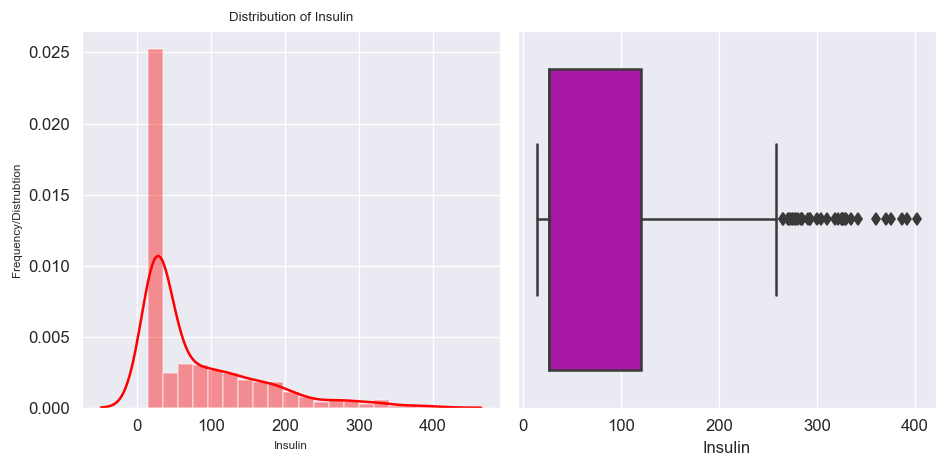

In [79]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=data,ax=axes[1],orient = 'v',color='m')
plt.tight_layout()

**we see that many outliers has been treated in x axis**

**BMI variable**

In [80]:
data.BMI.describe()

count    737.000000
mean      31.752103
std        7.739358
min        0.000000
25%       27.100000
50%       32.000000
75%       36.200000
max       59.400000
Name: BMI, dtype: float64

<font color = 'blue'> BMI = 0, does not make any sense. </font>

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


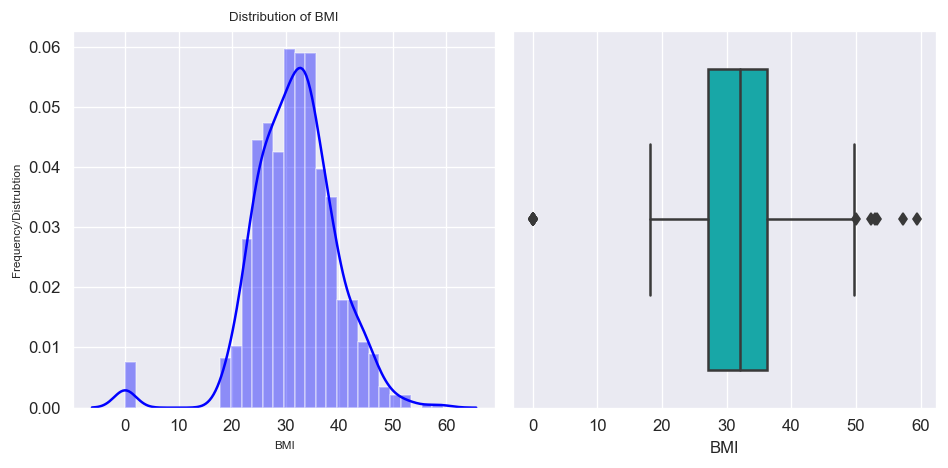

In [81]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=data,ax=axes[1],orient = 'v',color='c')
plt.tight_layout()

**Outliers are considerable, So i will replace zero with mean.**

In [84]:
data.BMI = data.BMI.replace(0,data.BMI.mean())
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6    148.0             72      35.000000       26  33.6  0.627   
1            1     85.0             66      29.000000       26  26.6  0.351   
2            8    183.0             64      20.428571       26  23.3  0.672   
3            1     89.0             66      23.000000       94  28.1  0.167   
4            0    137.0             40      35.000000      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


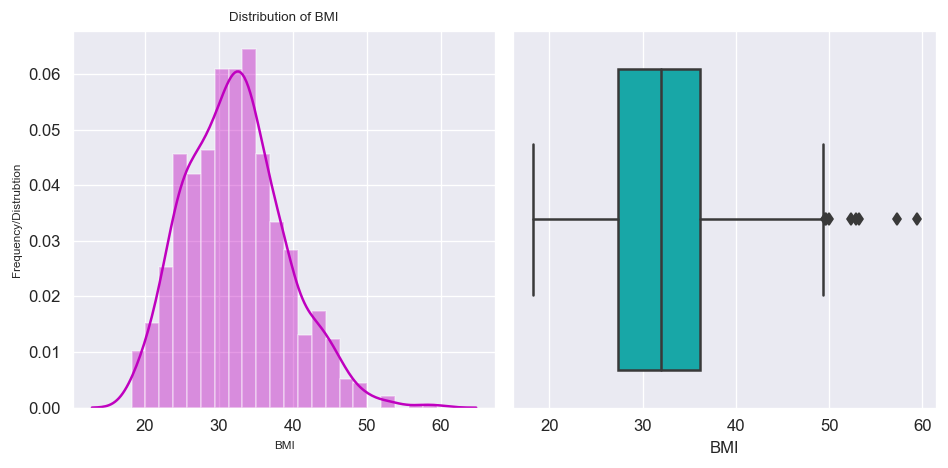

In [85]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=data,ax=axes[1],orient = 'v',color='c')
plt.tight_layout()

In [89]:
data.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Well things is fine here, Let us see for Outliers.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


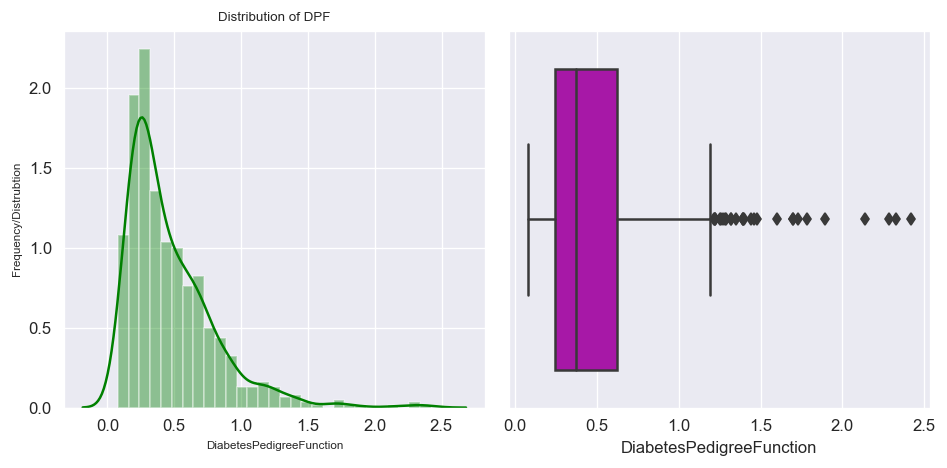

In [93]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['DiabetesPedigreeFunction'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DiabetesPedigreeFunction',data=data,ax=axes[1],orient = 'v',color='m')
plt.tight_layout()

Outliers are present at higher end. Let us treat them.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


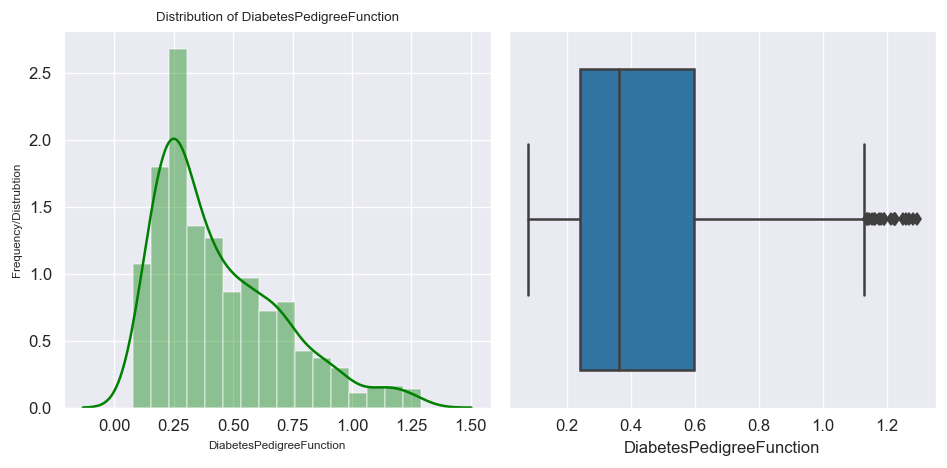

In [99]:
data = std_based('DiabetesPedigreeFunction',data)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['DiabetesPedigreeFunction'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DiabetesPedigreeFunction',data=data,ax=axes[1],orient = 'v')
plt.tight_layout()

**Age variable**

In [100]:
data.Age.describe()

count    748.000000
mean      33.215241
std       11.773541
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Let us take a look for outliers.

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


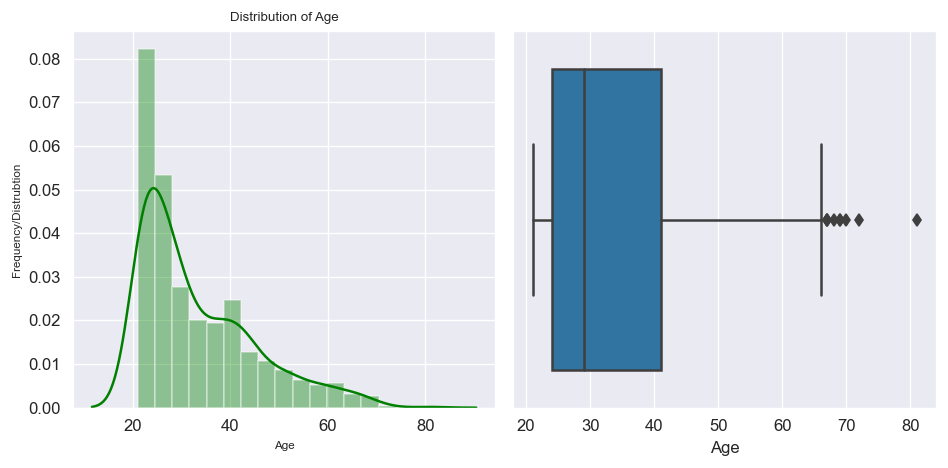

In [102]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=data,ax=axes[1],orient = 'v')
plt.tight_layout()

C:\Users\sara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sara\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


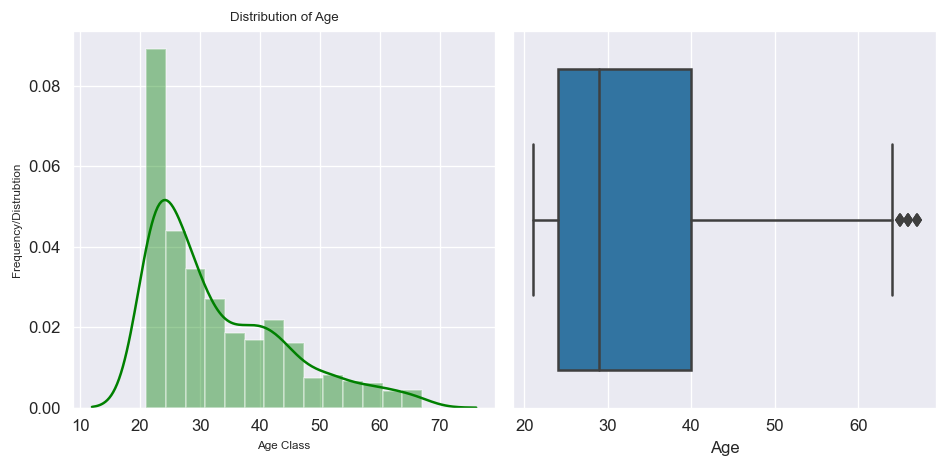

In [104]:
data = std_based('Age',data)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(data['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=data,ax=axes[1],orient = 'v')
plt.tight_layout()

**<font color = 'red'> Now we are done with missing value and Outliers.**

## Statistical Assumption

check for some assumption like variance. Distribution is absolutely fine. We have already seen in other notebooks.

In [105]:
data.var()

Pregnancies                    11.368006
Glucose                      1013.702376
BloodPressure                 375.304482
SkinThickness                 251.947532
Insulin                     12720.130719
BMI                            59.163840
DiabetesPedigreeFunction        0.069700
Age                           127.615919
Outcome                         0.226701
dtype: float64

**<font color = 'red'> Variance is varying to a greater extent, So i will standardize.</font>** I am removing dpf because variance is very low.

In [106]:
data.drop('DiabetesPedigreeFunction',axis = 1,inplace=True)

## Spliting Data

In [107]:
data.Outcome.value_counts()

0    485
1    257
Name: Outcome, dtype: int64

C:\Users\sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


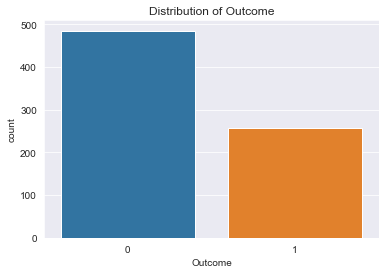

In [108]:
sns.countplot(data['Outcome']).set_title('Distribution of Outcome')
plt.show()

 Outcome is balance so we need not to **Stratify** data.

In [8]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [109]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(593, 7)
(149, 7)
(593,)
(149,)


In [110]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

### Before modeling I check, how data is behaving with Target variable using PCA

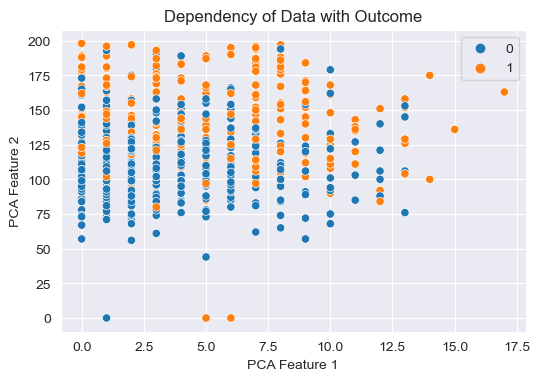

In [111]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

**Fitting a linear model to this data will not lead to better accuracy because data points are not linearly seperable.**

## KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [113]:
grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

Best Score ==>  0.7506214689265537
Tuned Paramerers ==>  {'n_neighbors': 15}
Accuracy on Train set ==>  0.7807757166947723
Accuracy on Test set ==>  0.8120805369127517


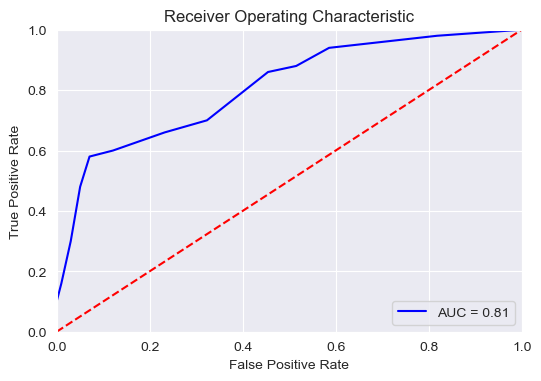

In [114]:
probs = grid_knn.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [116]:
grid_dtc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test_std,y_test))

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.9

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.9

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

Best Score ==>  0.7505367231638418
Tuned Paramerers ==>  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Accuracy on Train set ==>  0.7757166947723441
Accuracy on Test set ==>  0.7583892617449665


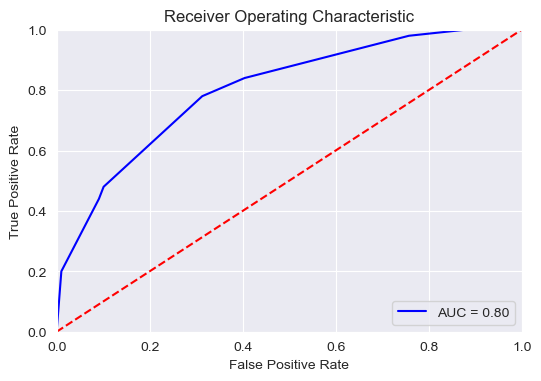

In [117]:
probs = grid_dtc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVC

In [118]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}

grid_svc = GridSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [119]:
grid_svc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test_std,y_test))

Best Score ==>  0.7638983050847458
Tuned Paramerers ==>  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Train set ==>  0.7672849915682968
Accuracy on Test set ==>  0.8053691275167785


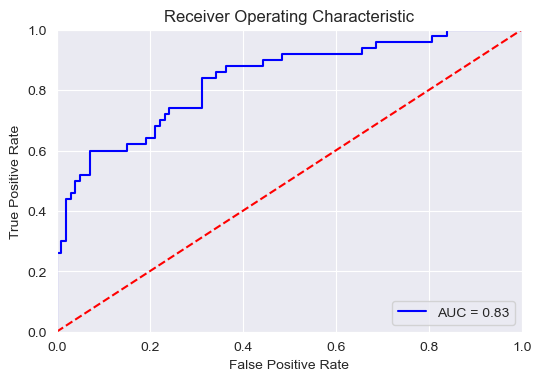

In [120]:
probs = grid_svc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**We can see SVC is doing better than KNN and Decision Tree. Let us combine these models and see if we can improve accuracy.**

## Voting Classifier

In [121]:
from sklearn.ensemble import VotingClassifier

classifiers = [('knn',grid_knn),('tree',grid_dtc),('svc',grid_svc)]

vtc = VotingClassifier(classifiers)

In [122]:
vtc.fit(x_train_std,y_train)
print("Accuracy on Test set ==> ", vtc.score(x_test_std,y_test))

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.8

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.9

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 221, in fit
    raise ValueError("min_samples_leaf must be at least 1 "
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.9

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for thes

Accuracy on Test set ==>  0.8053691275167785


**SVC is doing good till now. Let us see if Random Forest, XGBoost and ANN can help to achieve more accuracy.**

## Feature Selection

**I use RFE to select important features.**

In [123]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train_std,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

Accuracy with Feature 2 ==> 0.7248322147651006
Accuracy with Feature 3 ==> 0.7718120805369127
Accuracy with Feature 4 ==> 0.7718120805369127
Accuracy with Feature 5 ==> 0.8120805369127517
Accuracy with Feature 6 ==> 0.785234899328859


In [126]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5, verbose=0)
rfe.fit(x_train_std,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [127]:
print("Important Features are ==> ",list(data.columns[:7][rfe.support_]))

Important Features are ==>  ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


**Sometime keeping unwanted variable increase variance in model. I try to improve accuracy by removing them.**

In [130]:
x=data.loc[:,list(data.columns[:7][rfe.support_])].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

(593, 5)
(149, 5)
(593,)
(149,)


## Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'n_estimators':[200,500,1000],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
              'max_features':['auto','sqrt'],
              'criterion':['gini','entropy']}

grid_rfc = RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)

In [132]:
grid_rfc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_rfc.best_score_)
print("Tuned Paramerers ==> ",grid_rfc.best_params_)
print("Accuracy on Train set ==> ", grid_rfc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_rfc.score(x_test_std,y_test))

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sara\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

Best Score ==>  0.7521468926553673
Tuned Paramerers ==>  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Accuracy on Train set ==>  0.8330522765598651
Accuracy on Test set ==>  0.7718120805369127


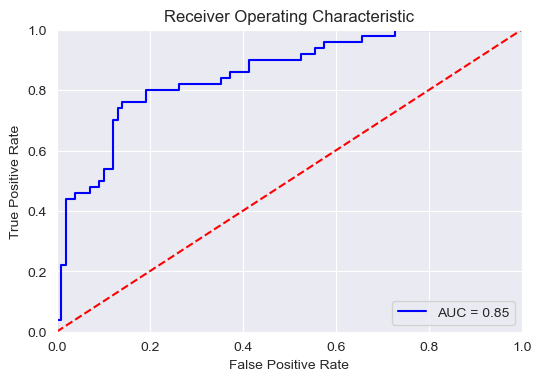

In [133]:
probs = grid_rfc.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XGBoost Classifier

In [137]:
import xgboost as xgb

xgbcl = xgb.XGBClassifier()

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

In [138]:
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

C:\Users\sara\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 


[20:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric 

[20:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 


[20:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 


[20:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric 

[20:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 

[20:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings 


[20:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score ==>  0.7638418079096044
Tuned Paramerers ==>  {'subsample': 1, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1, 'booster': 'gbtree'}
Accuracy on Train set ==>  0.8397976391231029
Accuracy on Test set ==>  0.8053691275167785


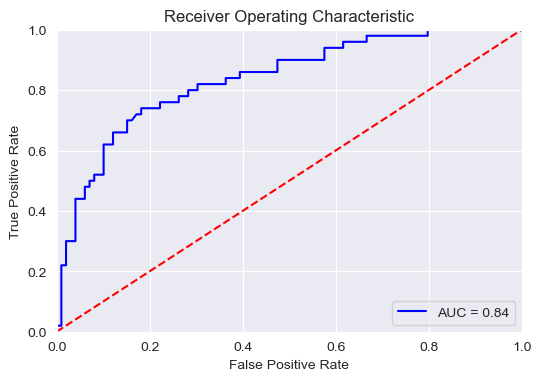

In [139]:
probs = grid_xgb.predict_proba(x_test_std)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Among all SVC, Random Forest and XGBoost Classifiers are doing well.


<h3> Skewness</h3>

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

**Mode:** The most frequently occurred number in a given set of observations is called mode.The mode can be one or more than one. It is possible to have no mode at all, as well.***When there is a nominal distribution of data, the mode is preferred.***

**Median:** The middle number in a given set of observations is called Median.After arranging everything from smallest to biggest, take out the middle number, which is your median.***When data distribution is skewed, median is the best representative.***

**Mean:** The average taken of given observations is called Mean.Add up all the numbers and divide by the total number of terms.***When data is normally distributed, the mean is widely preferred.***

**Result:**
* Distribution of Glucose and BloodPressure are nearly normal, so I impute nan-values with mean of data to fill .
* Distribution of SkinThickness, Insulin and BMI have right skewness, so I impute nan-values with median of data to fill.

In [11]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)
